# Lecture 12 -- Introduction to Neural Networks
In this lecture, students will receive a high-level overview of what a neural network is and how to implement a basic one using PyTorch. While this is a basic introduction, it should get you started understanding all of the different options for optimizers, network infrastructure, etc. 

These notes borrow heavily from QuantEcon's Notes on [Neural Networks](https://datascience.quantecon.org/tools/regression.html) in terms of order of topics, structure, some notation, etc. I referenced some related pytorch tutorials [here](https://pytorch.org/tutorials/beginner/basics/intro.html) when creating this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split


## What is a Neural Network?
Artificial neural networks are a class of machine learning algorithm that can be trained for a myriad of tasks: regression, classification, text/image generation, controlling robotics, playing games, etc.


Before starting to talk about what a Neural Network is, we will introduce the most basic version of a neural network -- a multi-layer perceptron (MLP). To start, we will consider an MLP with a single **hidden layer**.

Like linear regression, we can write the single-layer MLP as an equation of matrices and vectors. 

$$
y = f_1(XW_1 +^* b_1)w_2 +^* b_2
$$
**Dependent Variable**
- $y$ is an $n$ column vector  of dependent variables. 
    - Continuous variable -- will handle classification later.

We will look at the right-hand side of the equation step-by-step

**The Right-Hand Side -- $XW_1$**
- $X$ is a matrix of independent variables with $n$ rows (observations) and $d$ columns (variables)
- $W_1$ is is a matrix with $d$ rows and $n_1$ columns. 
    - **We choose what $n_1$ is**.
    - A weight matrix, many weight vectors stacked side-by-side
- $XW_1$ has $n$ rows and $n_1$ columns.

**The Right-Hand Side -- $XW_1 +^* b_1$**
- $b_1$ is a *bias vector* of size $n_1$
   - how can we add a vector to $XW_1$, an $n$ by $n_1$ matrix?!
- $+^*$ is not element-wise addition -- instead it adds $b_1$ to **each row** of $XW_1$.
- $XW_1 +^* b_1$ also has $n$ rows and $n_1$ columns.

**The Right-Hand Side -- $f_1(XW_1 +^* b_1)$**
- $f_1(.)$ is known as the *activation function*
  - Non-linear function
  - Generally operates element-wise
- $f_1(XW_1 +^* b_1)$ is still a matrix of $n$ rows and $n_1$ columns.


**The Right-Hand Side -- $f_1(XW_1 +^* b_1)w_2$**
- $w_2$ is an $n_1$ vector. 
- $f_1(XW_1 +^* b_1)w_2$ is an $n$-vector (or a matrix with $n$ rows & 1 column)

**The Right-Hand Side -- $f_1(XW_1 +^* b_1)w_2 +^* b_2 $**
- $b_2$ is a scalar 
- $+^*$ means we add $b_2$ to each row of $f_1(XW_1 +^* b_1)w_2$ (or each element since it is a vector).
- $f_1(XW_1 +^* b_1)w_2 +^* b_2$ is an $n$-vector (specifically a column vector)

This is good -- the dimensions of the righ-hand and left-hand sides are the same.

## What are the model Parameters?
There are two types of parameters. The first type are the parameters of the model that need to be estimated or learned (more on that later). In the example above, we need to estimate $W_1, b_1, w_2, \text{ and }b_2$.

The second type of parameters are **hyperparameters**. In this case, $n_1$ is a hyperparameter because it must be specified by the algorithm user. We have seen hyperparameters before -- $\alpha$ in LASSO regression is a hyperparameter. Like with $\alpha$, you could choose $n_1$ through cross-validation, but it can become computationally infeasible later on.

You can also think of your choice of activation function $f_1(.)$ as a hyperparameter because we can choose the function as long as it is non-linear. That being said, most people generally do not refer to a function as a parameter. Still it is a meaningfull choice a practioner can make.

## Why is this called a Neural Network?
This model is called a neural network because it loosely mimics neurons in a biological brain. By looking at the picture blow, we can see how

The nodes (or neurons) are the filled circles you see below. Nodes send signals to other nodes that are connected to them by an edge (like synapses). The strength of the signal is determined by the weights. These weights correspond to elements of $W_1$ and $w_2$. 

Let's see how the math corresponds to this conception of a neural network. 

#### Nodes
- The blue nodes are our input data -- each one represents a different variable. In this case, there are five variables ($d = 5$)
- We chose the number of green nodes, also known as hidden nodes, by choosing $n_1$. In the picture below, $n_1$ is equal to 3.
- The orange nodes are the output nodes. There are actually two output nodes in this picture -- neural networks can do that! In the example given above, there would be only one orange node. 

#### Edges
- The edges (lines) connecting the blue nodes with the green ones corespond to the matrix weights $W_1$. The blue nodes correspond to the rows of $W_1$ whereas the green nodes correspond to the columns. 
 - For instance, the weight of the line connecting the top-most blue node with the middle green node is the element in the first row and second column of $W_1$.
 - In the picture below, $W_1$ would have five rows and three columns. 
- Each green node has its own (scalar) bias term that is added to the signal it is sent. These $n_1$ bias terms comprise the vector $b_1$. Then each green node applies a non-linear transformation  ($f_1(.)$ from earilier) on the signal before it is sent to the orange node. 
- Finally, the signal from each of the green nodes is multiplied $n_1$ scalars (corresponding to the $n_1$ elements of the vector $w_2$), resulting in a single output node (orange node). 
    - In the example below, there are two output nodes. In this case, $w_2$ would actually be a matrix $W_2$. What do you think the size of $W_2$ would be? What would that mean about the size of the output?


<img src="https://static.javatpoint.com/tutorial/tensorflow/images/single-layer-perceptron-in-tensorflow.png" alt="Alternative text" />



## Multiple Hidden Layers
In this most-basic example, we assumed there was one hidden layer. That layer consisted of $n_1$ hidden nodes or units. We can also add more hidden layers, each of which is connected to the next through a series of weighted lines until the output layer is reached.

For instance, if we have $m$ hidden layers, they can all have different
- number of hidden nodes -- $n_1, n_2,...,n_m,$
- activation functions -- $f_1(.), f_2(.),...,f_m(.)$
- bias terms -- $b_1, b_2,...,b_m$

Then the output layer has its own hidden bias term $b_m$.

Below is an MLP with $m=2$ hidden layers ([Image Source](https://medium.com/codex/introduction-to-how-an-multilayer-perceptron-works-but-without-complicated-math-a423979897ac)).

**Note** that the bias is conceptualized as another node in each layer. This conceptualization is nice because the bias is generally represented a single vector. It can, however, be confusing as it does not count as one of the hidden nodes when determining the size of all of the other objects such as the weight matrices.
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*4_BDTvgB6WoYVXyxO8lDGA.png" alt="Alternative text" />

**Ignoring the second output node**, this would look like
$$
y = f_2\left(f_1(XW_1 +^* b_1)W_2 +^* b_2 \right)w_3 +^* b_3
$$

- $W_2$ has $n_1$ rows and $n_2$ columns necause it holds the weights of the edges connecting the two hidden layers
- $b_2$ is an $n_2$-vector that is being **added row-wise** to the matrix preceding it.
- $w_3$ is an $n_2$ column vector representing the edges of the second hidden layer to the output layer
- $b_3$, a scalar, is the last bias term

This pattern generalizes to $m$ layers:
$$
y = f_m(\ldots (f_3(f_2\left(f_1(XW_1 +^* b_1)W_2 +^* b_2 \right)W_3+^*b_3)\ldots )W_m+^* b_m)w_{m+1} + b_{m+1}
$$
where the $\ldots$ stand in for layers 4 through $m-1$.

## Activation Functions
So far, we have said that activation functions should be
- Non-linear
- Operate element-wise on the matrices

Here are some example of common activation functions.

### Binary Step Function
$$
f(x) = \left\{\begin{array}{cc}
0 & \text{if } x < 0 \\
1 & \text{if } x \geq 0 
\end{array} \right.
$$

This is technically an activation function, but it is not usually used due to its slope being 0.

### Logistic Function
$$
f(x) = \frac{1}{1+e^{-x}}
$$

This is the logistic function that we used in logistic regression. This function can be used in tandem with a cutoff rule for binary classification problems. 

Suffers from a problem known as vanishing gradient. This can cause weights to be sub optimal for a reason we will discuss later. 


When talking about a line in two dimensional space, gradient is just another word for slope. Without knowing exactly what the vanishing gradient problem is, can you guess what kinds of x values might result in it by looking at the plot below?

Text(0.5, 1.0, 'Logistic Function')

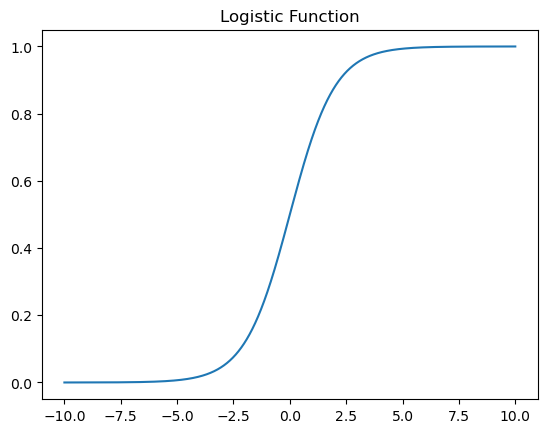

In [2]:
xgrid = np.linspace(-10, 10, 100000)
logistic_function = np.vectorize(lambda x: 1 / (1 + math.exp(- x)))
plt.plot(xgrid, logistic_function(xgrid))
plt.title("Logistic Function")

### ReLU
$$
f(x) = max(0,x)
$$
ReLU stands for **Re**ctified **L**inear **U**nit. This does not have the vanishing gradient problem on the right hand side, but can result in hidden nodes that are fed negative numbers to send no signal (dead nodes).

Text(0.5, 1.0, 'ReLU')

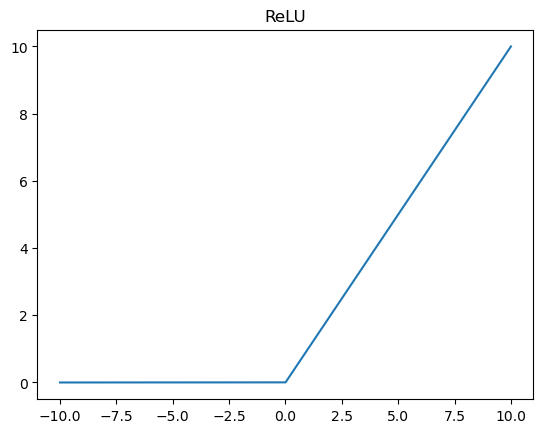

In [3]:
relu_function = np.vectorize(lambda x: np.array([0,x]).max())
plt.plot(xgrid, relu_function(xgrid))
plt.title("ReLU")

### Leaky and Parametric ReLU
$$
f(x) = max(a * x,x)
$$

$a$ can be chosen to be a number less than one (leaky) or it can be learned like other parameters in the model (parametric). These can help deal with the dead node issues of the ReLU 

Text(0.5, 1.0, 'Leaky or Parametric ReLU')

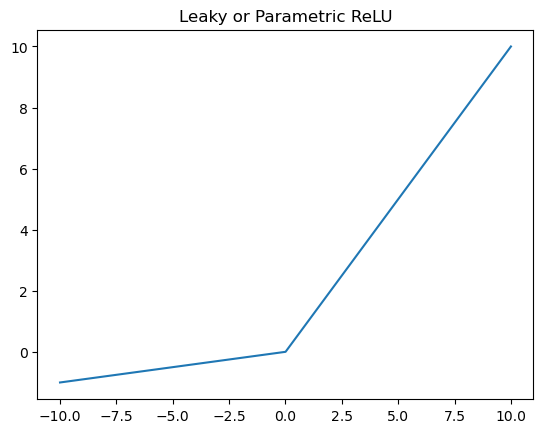

In [4]:
relu_function = np.vectorize(lambda x: np.array([.1 * x,x]).max())
plt.plot(xgrid, relu_function(xgrid))
plt.title("Leaky or Parametric ReLU")

### Swish
$$
f(x) = \frac{x}{1+e^{-x}}
$$
Used by Google researchers
- Smooth at x = 0
- 0s out large negative values but not small ones due to bump.

Text(0.5, 1.0, 'Swish')

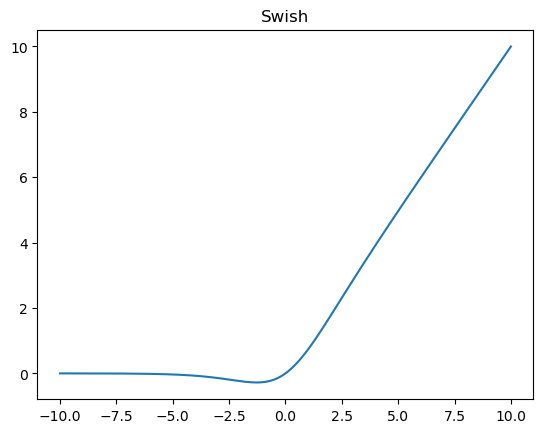

In [5]:
swish_function = lambda x: x * logistic_function(x)
plt.plot(xgrid, swish_function(xgrid))
plt.title("Swish")

### Many Other Activation Functions
There are many other activation functions out there -- many of them look like a variation of ReLU.  ([Image Source](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/62b18a8dc83132e1a479b65d_neural-network-activation-function-cheat-sheet.jpeg)). 



<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/62b18a8dc83132e1a479b65d_neural-network-activation-function-cheat-sheet.jpeg" alt="Alternative text" />


Notice you will see a linear activation function above! I think it is better if you call this the **identity activation** simply because it is a function returns the input.
$$
f(x) = x
$$
This is basically the same as having no activation function like our output layer from earlier. An alternative view is that you can think of the output layer having this "identity" activation function. That is, we can define $f_{m+1}(x) = x$ and write our equation as
$$
\begin{align*}
y = &f_{m+1}\left(f_m(\ldots (f_3(f_2\left(f_1(XW_1 +^* b_1)W_2 +^* b_2 \right)W_3+^*b_3)\ldots )W_m+^* b_m)w_{m+1} + b_{m+1}\right)\\ =& f_m(\ldots (f_3(f_2\left(f_1(XW_1 +^* b_1)W_2 +^* b_2 \right)W_3+^*b_3)\ldots )W_m+^* b_m)w_{m+1} + b_{m+1}
\end{align*}
$$

When coding, however, the function linear refers to multiplying an input by a weight matrix and adding a bias.

## Neural Networks for Binary Classification
In fact, to make a Neural Network classifier, all we have to do is have the output layer have a logistic activation function. Now, 
$$
f_{m+1}(x) = \frac{1}{1+ e^{-x}}
$$

Using this, we can turn our regression problem into a binary classification problem because now our network will always return a number between one and zero which we can turn into classification with a cutoff value.

$$
Pr(y) = f_{m+1}\left(f_m(\ldots (f_3(f_2\left(f_1(XW_1 +^* b_1)W_2 +^* b_2 \right)W_3+^*b_3)\ldots )W_m+^* b_m)w_{m+1} + b_{m+1}\right)
$$

Perfect classification no loner requires data to be linearly separable!

We will talk about multi-label classification in a bit.

## Coding Some Networks

We are going to use PyTorch to code some neural networks. While `sklearn` might be somewhat more friendly to use, PyTorch will take you much farther if you want to learn more in the future. Also, PyTorch still makes coding high-performance neural networks far easier than it would if you had to do it from scratch. 


After doing this, we will give a high-level overview of some loss functions that neural networks use and the algorithms that use these loss values to help the Neural Network learn -- i.e. estimate "good" values for its parameters
- Weight matrices and array $(W_1, W_2,...,W_m, w_{m+1})$
- Bias Vectors $(b_1, b_2,...,b_{m+1})$

Let's import the packages we need to build our network

In [6]:
# Import PyTorch, note you may need to pip install it
import torch

# We will be using this particular submodule a lot, so we're giving it an alias
import torch.nn as nn 

# Using ordered dictionaries to construct our models
from collections import OrderedDict

# Use this to make visualization
from torchviz import make_dot

# We are using the CPU as our device
device = "cpu"

# Neural networks will use a random estimation process -- this line helps ensure the results are consistent
torch.manual_seed(0)

In [7]:
# Might need to pip install here!
#%pip install torch
#%pip install torchviz

We're going to start by building a vanilla Neural Network (MLP) for regression. Before building the network, you frequently want to know how many input variables there will be.

We will use [data on insurance charges](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv). You can find this data on Kaggle as well. Namely, observations are medical costs billed by health insurance for an individual. To predict charges, we will use the following variables: age, sex, body mass index (BMI), number of children, smoking status, and region in US.

First, let's load the data into the notebook.

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Preparing Data for Use
Before throwing data into a MLP, we need to make sure the data we're sending is numeric. For the variables `sex` and `smoker`, this will be easy

- convert "female" to 1 and "male" to 0 
- "yes" to 1 and "no" to 0

For our `region` variable we have more than two regions, we are going touse `one-hot-encoding` which we introduced in the regression lecture. Recall  this entails turning a single column containing many $k$ categorical values into $k$ columns containing dummy variables. Again, we will use `get_dummies()` to obtain these dummy variables.

Like with regression trees, we can include all categories -- it will not make the estimation undoable like with linear regression. That being said, we can also just include three of them as we would do in linear regression. 

In [10]:
fake_series = pd.Series(["northeast", "northwest", "northeast","southeast", "southwest","southwest","southeast", "northeast", "southwest", "northeast"])
pd.concat([fake_series, pd.get_dummies(fake_series)], axis = 1)

,0,northeast,northwest,southeast,southwest
0,northeast,1,0,0,0
1,northwest,0,1,0,0
2,northeast,1,0,0,0
3,southeast,0,0,1,0
4,southwest,0,0,0,1
5,southwest,0,0,0,1
6,southeast,0,0,1,0
7,northeast,1,0,0,0
8,southwest,0,0,0,1
9,northeast,1,0,0,0


Now we will build our independent variable matrix `X` and dependent variable `y`. Once we remove the comparison groups (`sex="male"`, `smoker="no"`, and `region="southeast"`). 

In [11]:
X = pd.concat([df[["age", "bmi", "children"]], 
               pd.get_dummies(df.sex), 
               pd.get_dummies(df.smoker),
               pd.get_dummies(df.region)], axis = 1)

# Drop comparison groups ()
X = X.drop(columns=["male", "no", "southeast"])
X

,age,bmi,children,female,yes,northeast,northwest,southwest
0,19,27.900,0,1,1,0,0,1
1,18,33.770,1,0,0,0,0,0
2,28,33.000,3,0,0,0,0,0
3,33,22.705,0,0,0,0,1,0
4,32,28.880,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0
1334,18,31.920,0,1,0,1,0,0
1335,18,36.850,0,1,0,0,0,0
1336,21,25.800,0,1,0,0,0,1


In [12]:
y = df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## DataFrame to Array and Train/Test Split
We want our data to be what is called a **tensor**, not DataFrames. You can think of tensors as like arrays, but they are actually a generalization of them. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=40)

X = torch.tensor(X.to_numpy())
y = torch.tensor(y.to_numpy()).view(len(y), 1)
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train).view(len(y_train), 1)
y_test = torch.tensor(y_test).view(len(y_test), 1)

In [14]:
y_train.shape

torch.Size([1070, 1])

## Network Structure
Now that we know the size of our input data, we can begin to think of how the network will be structured. Some aspects of the network are fixed by out data setup:
- Single regression $\implies$ one node in the output layer.
- Eight independent variables $\implies$ eight nodes in the input layer.
- $f_{m+1}$ is generally fixed by the problem (linear for regression, logistic for binary classification, etc.)

We can choose
- the number of hidden layers, $m$
- the number of nodes in each hidden layer, $n_1,...,n_m$
- the activation function in each hidden layer, $f_1, f_2,... f_m$.

Given we have so many choices and that neural networks can take a long time to train, cross-validating for all combinations of parameters and activation functions becomes computationally infeasible quickly. Can choose between select configurations of these hyperparameters using out of sample data.

With all of this in mind, we demonstrate the easiest way to build a neural network using `nn.sequential`. In the example below, we make a neural network with
- Input Layer: $d = 8$ Nodes for eight independent variables
- Hidden Layer 1: $n_1 = 15$ nodes with activation function ReLU
- Hidden Layer 2: $n_2 = 20$ nodes with activation function Leaky ReLU $a = .01$
- Hidden Layer 3: $n_2 = 20$ nodes with activation function Leaky ReLU $a = .01$
- Hidden Layer 4: $n_2 = 15$ nodes with activation function Leaky ReLU $a = .1$
- Output Layer: One node for one output with no activation (identity activation)

Let's build this model below. A few things to note
- We're making an ordered dictionary so we can name each layer.
- `nn.linear` creates a layer that like those found in a MLP (it is not the identity activation). Specifically, it refers to the fact that we want to multiply an input and  These layers are also called "dense" or "fully connected" because each node in every hidden layer is connected to every other node in the preceding and subsequent layers by an edge.

In [15]:
### Define our Network Structure

# Define parameters
d = 8
ns = [15, 20, 20, 15]
# Leaky ReLU with neg slope of .1

act_funs = [nn.ReLU(), nn.LeakyReLU(), nn.LeakyReLU(), nn.LeakyReLU(negative_slope = .1)]

# Normalization layer -- similar to standardization but some aspects of it can be learned
norm_layer = [('norm', nn.BatchNorm1d(d))]

# Input Later -- specify dimensions of input layer and hidden layer 1
in_h1_list = [('in_h1', nn.Linear(d, ns[0])),
         (f'act_1', act_funs[0])]

hidden_layer_list = []
for i,n in enumerate(ns[1:len(ns)]):
    hidden_layer_list.append((f'h{i+1}_h{i+2}', nn.Linear(ns[i], ns[i+1]))) # specify dimensions of hidden layers i & i+1
    hidden_layer_list.append((f'act_{i+2}', act_funs[i+1])) 

hm_out_list = [(f'h{len(ns)}_out', nn.Linear(ns[len(ns)-1], 1))]

model_list = norm_layer + in_h1_list + hidden_layer_list + hm_out_list


insure_model = nn.Sequential(OrderedDict(model_list)).to()
       

In [16]:
# Look at objects in this cell
insure_model

Sequential(
  (norm): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (in_h1): Linear(in_features=8, out_features=15, bias=True)
  (act_1): ReLU()
  (h1_h2): Linear(in_features=15, out_features=20, bias=True)
  (act_2): LeakyReLU(negative_slope=0.01)
  (h2_h3): Linear(in_features=20, out_features=20, bias=True)
  (act_3): LeakyReLU(negative_slope=0.01)
  (h3_h4): Linear(in_features=20, out_features=15, bias=True)
  (act_4): LeakyReLU(negative_slope=0.1)
  (h4_out): Linear(in_features=15, out_features=1, bias=True)
)

## A Custom Class
Now that we have our network structure defined, we can create an custom data structure or **class**. We did not cover these in this course, but they essentially allows us to create a class of objects that 
- have similar properties or pieces of information
- we want to perform similar operations on 

For instance, a customer might be a class, and we could have various pieces of information on that customer. Some operations we may want to perform on that object might be updating their personal information, sending an email to them using their email address, etc.

Below we define a class (using `class`) called MLP using our network.

In [17]:
class MLP(nn.Module):
    # This is a Constructor that helps us construct the object when it is initialized using MLP()
    def __init__(self):
        super().__init__()
        self.network = insure_model
        
    # This is called forward because it sends the data x through the network to give us a prediction
    def forward(self, x):
        yhat = self.network(x)
        return yhat

In [18]:
# This initializes a model including weights
model = MLP().to(device, dtype=float)


In [19]:
# See the model parameters and their sizes
for name, param in model.named_parameters():
    print(name)
    print(f"Parameter size {param.size()}")

network.norm.weight
Parameter size torch.Size([8])
network.norm.bias
Parameter size torch.Size([8])
network.in_h1.weight
Parameter size torch.Size([15, 8])
network.in_h1.bias
Parameter size torch.Size([15])
network.h1_h2.weight
Parameter size torch.Size([20, 15])
network.h1_h2.bias
Parameter size torch.Size([20])
network.h2_h3.weight
Parameter size torch.Size([20, 20])
network.h2_h3.bias
Parameter size torch.Size([20])
network.h3_h4.weight
Parameter size torch.Size([15, 20])
network.h3_h4.bias
Parameter size torch.Size([15])
network.h4_out.weight
Parameter size torch.Size([1, 15])
network.h4_out.bias
Parameter size torch.Size([1])


## Try Prediction
The Model weights are initialized randomly and haven't been trained yet, so they will not perform very well. Nevertheless, it's worth showing that we can predict using the `model.forward()`.

In [20]:
# Predictions are bad but the network is working
print(model.forward(X))

# Can also do this with just model()
print(all(model.forward(X) == model(X)))

tensor([[-0.1538],
        [-0.1390],
        [-0.1343],
        ...,
        [-0.1495],
        [-0.1546],
        [-0.1477]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
True


## Training the Model (Estimating the Parameters)
The model has not "seen" the data. The weights and biases that our model currently has are random and therefore are not predicting data well. To train the model, we must first define a loss function. Since we are dealing with a regression problem, we will use the Mean-Squared Error:
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y}_i)^2
$$
where $\hat{Y}_i$ is the output from our neural network. 

Training a neural network involves many iterations of forward propogation and backward propogation. 
- In forward propogation, we send a portion of our data, called a **batch**, into the network to get predictions (hence the `.forward()` method for prediction). 
- Using those prediction we can calculate the loss function (in our case MSE).
- A simplified version of back propogation: Fixing our inputs and outputs, back propogation determines in which direction and by how much each weight and bias should move in order to reduce the loss. It then changes each weight and bias accordingly. 

For our simple network, this whole process can be expressed as matrix multiplication but back propogation requires some multivariate calculus. Neverthless, we can still conceptualize it.  

Figuring out in which direction a parameter should move is determined by it the gradient of the loss function with that parameter. Once that has been deterimined, each parameter can be updated so that the loss is reduced and the predictions become closer to what we want to see.

Such methods are frequently called **gradient descent** methods. To help you understand them,  think of a topological feature (such as a hill, mountain, valley, etc.). The **gradient** tells you which direction to walk **from where you stand** in in order to go down the hill or valley the fastest.

Instead of physical ground, this surface is determined by the value of the loss function (for fixed X and y) at different values of the weights and biases. Unfortunately, this can only be visualized easily when there are only two parameters (such as bivariate linear regression with an intercept).

The size of the step we take is called the **learning rate**. There are a lot of ways this can be chosen and it can also vary as you train more data (usually by getting smaller). 

**Batch size** refers to how many observations of data we feed the network before updating parameters and **epochs** determines how many times we go through the whole data set. 

In [21]:
# How much data we feed the network at once
batch_size = 256

# How many batches we feed the network
epochs = 5_000

# Define Loss Function
mse_func = nn.MSELoss()

# Set up Optimizer (SGD)
# Set learning rate
learning_rate = 1e-2

# Tell optimizer the learning rate and which parameters to learn
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## Training Loop
Now we have to build a function that goes through (forward and back propogation) our whole dataset once and updates the weights in the network accordingly. Note that we never defined the train method -- it inherited this method from the `nn.Module`.

In [22]:
def epoch_train(X, y, model, optimizer, loss_func, train_error, batch_size=64):
    # Random Data Indices for batches
    rand_idx = torch.randperm(X.shape[0])
    
    # Figure out number of iterations for whole dataset
    sample_size = len(y)
    number_iter = (sample_size // batch_size) + 1
    
    # This sets the model into training mode
    model.train()
   
    weighted_sum_loss = 0
    for i in range(number_iter):
        if (i != number_iter - 1):
            index_i = rand_idx[(i*batch_size):((i+1)*batch_size)]
        else:
            index_i = rand_idx[i*batch_size:len(rand_idx)]
                
        # Predict (Forward Propogation)
        yhat = model(X[index_i,:])
        loss = loss_func(yhat, y[index_i])
        
        # Update Parameters (Back Propogations)
        loss.backward()
        # Deals with Exploding Gradient Problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm = 10)
        # Steps optimizer in direction
        optimizer.step()
        # Zero out gradients for next batch
        optimizer.zero_grad()
        # Calulate weighted summed losses
        weighted_sum_loss += loss.item() * len(yhat)
    # Weighted average loss to list
    train_error.append(weighted_sum_loss/len(y))
        
            

## Testing Loop
We may also want to evaluate the out-of-sample performance each epoch to make sure the neural network is learning properly.

In [23]:
def epoch_test(X, y, model, loss_func, test_error):
    # Set the model to evaluation -- this is important for normalization layers
    model.eval()
    
    # Turn off unnecessary gradient calculations -- no learning, just predictiong
    with torch.no_grad():
        # predict X
        yhat = model(X)
        # Out-of-sample loss
        loss = loss_func(yhat, y).item()
        # Add loss to list
        test_error.append(loss)
    

In [24]:
train_error = []
test_error = []
best_fit = np.inf
best_epoch_index = -1
for t in range(epochs):
    epoch_train(X_train, y_train, model, optimizer, mse_func, train_error, batch_size = batch_size)
    epoch_test(X_test, y_test, model, mse_func, test_error)
    # If this is the best model in terms of out-of-sample or testing error, save it
    if test_error[t] <= best_fit:
        best_fit = test_error[t]
        torch.save(model.state_dict(), "lecture_generated_objects//best_network.pth") 
        best_epoch_index = t
        
    if (t+1) % 500 == 0:
        print(f"Epoch {t+1} Complete\n-------------------------------")
        print(f"Train Error Was {train_error[t]}")
        print(f"Test Error Was {test_error[t]}")
        print("-------------------------------")

Epoch 500 Complete
-------------------------------
Train Error Was 24679324.913266595
Test Error Was 23923490.30989832
-------------------------------
Epoch 1000 Complete
-------------------------------
Train Error Was 22786296.28633294
Test Error Was 21446778.51353811
-------------------------------
Epoch 1500 Complete
-------------------------------
Train Error Was 21010989.715647306
Test Error Was 20616839.231746726
-------------------------------
Epoch 2000 Complete
-------------------------------
Train Error Was 20014153.086804837
Test Error Was 20212897.75146882
-------------------------------
Epoch 2500 Complete
-------------------------------
Train Error Was 20184031.68746115
Test Error Was 20493134.581607092
-------------------------------
Epoch 3000 Complete
-------------------------------
Train Error Was 19569592.332571145
Test Error Was 22025223.662800156
-------------------------------
Epoch 3500 Complete
-------------------------------
Train Error Was 19773572.371843223
T

In [25]:
# See how model performs out-of-sample
yhat_test = model.forward(X_test)
nn_mse = skl.metrics.mean_squared_error(yhat_test.detach().numpy(), y_test.detach().numpy())
nn_mse

21091402.355521813

In [26]:
from sklearn import linear_model
multi_lr_model = linear_model.LinearRegression()
multi_lr_model.fit(X_train, y_train)
mse_lr =skl.metrics.mean_squared_error(y_test, multi_lr_model.predict(X_test))

mse_lr_is = skl.metrics.mean_squared_error(y_train, multi_lr_model.predict(X_train))

In [27]:
print(f"Neural Networks Out of Sample Error is {nn_mse:.2f}.")
print(f"Linear Regression Out of Sample Error is {mse_lr:.2f}")

Neural Networks Out of Sample Error is 21091402.36.
Linear Regression Out of Sample Error is 39737837.06


## Plotting the Training Path
Not every iteration of stochastic gradient descent guarantees that it performs better either in-sample or out-of-sample. It can help to plot the loss at each epoch!

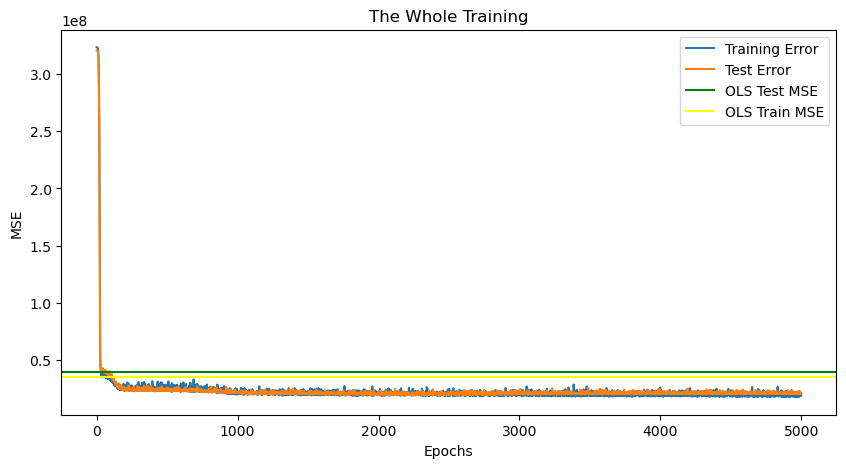

In [28]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(range(epochs), train_error, label = "Training Error")
ax.plot(range(epochs), test_error, label = "Test Error")
ax.set_title("The Whole Training")
ax.axhline(mse_lr, label = "OLS Test MSE", color = "green")
ax.axhline(mse_lr_is, label = "OLS Train MSE", color = "yellow")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
plt.legend()

## A Better Plot
It is kind of hard to discern much from this plot -- let's try and zoom in on what happens after we start performing about as well as OLS

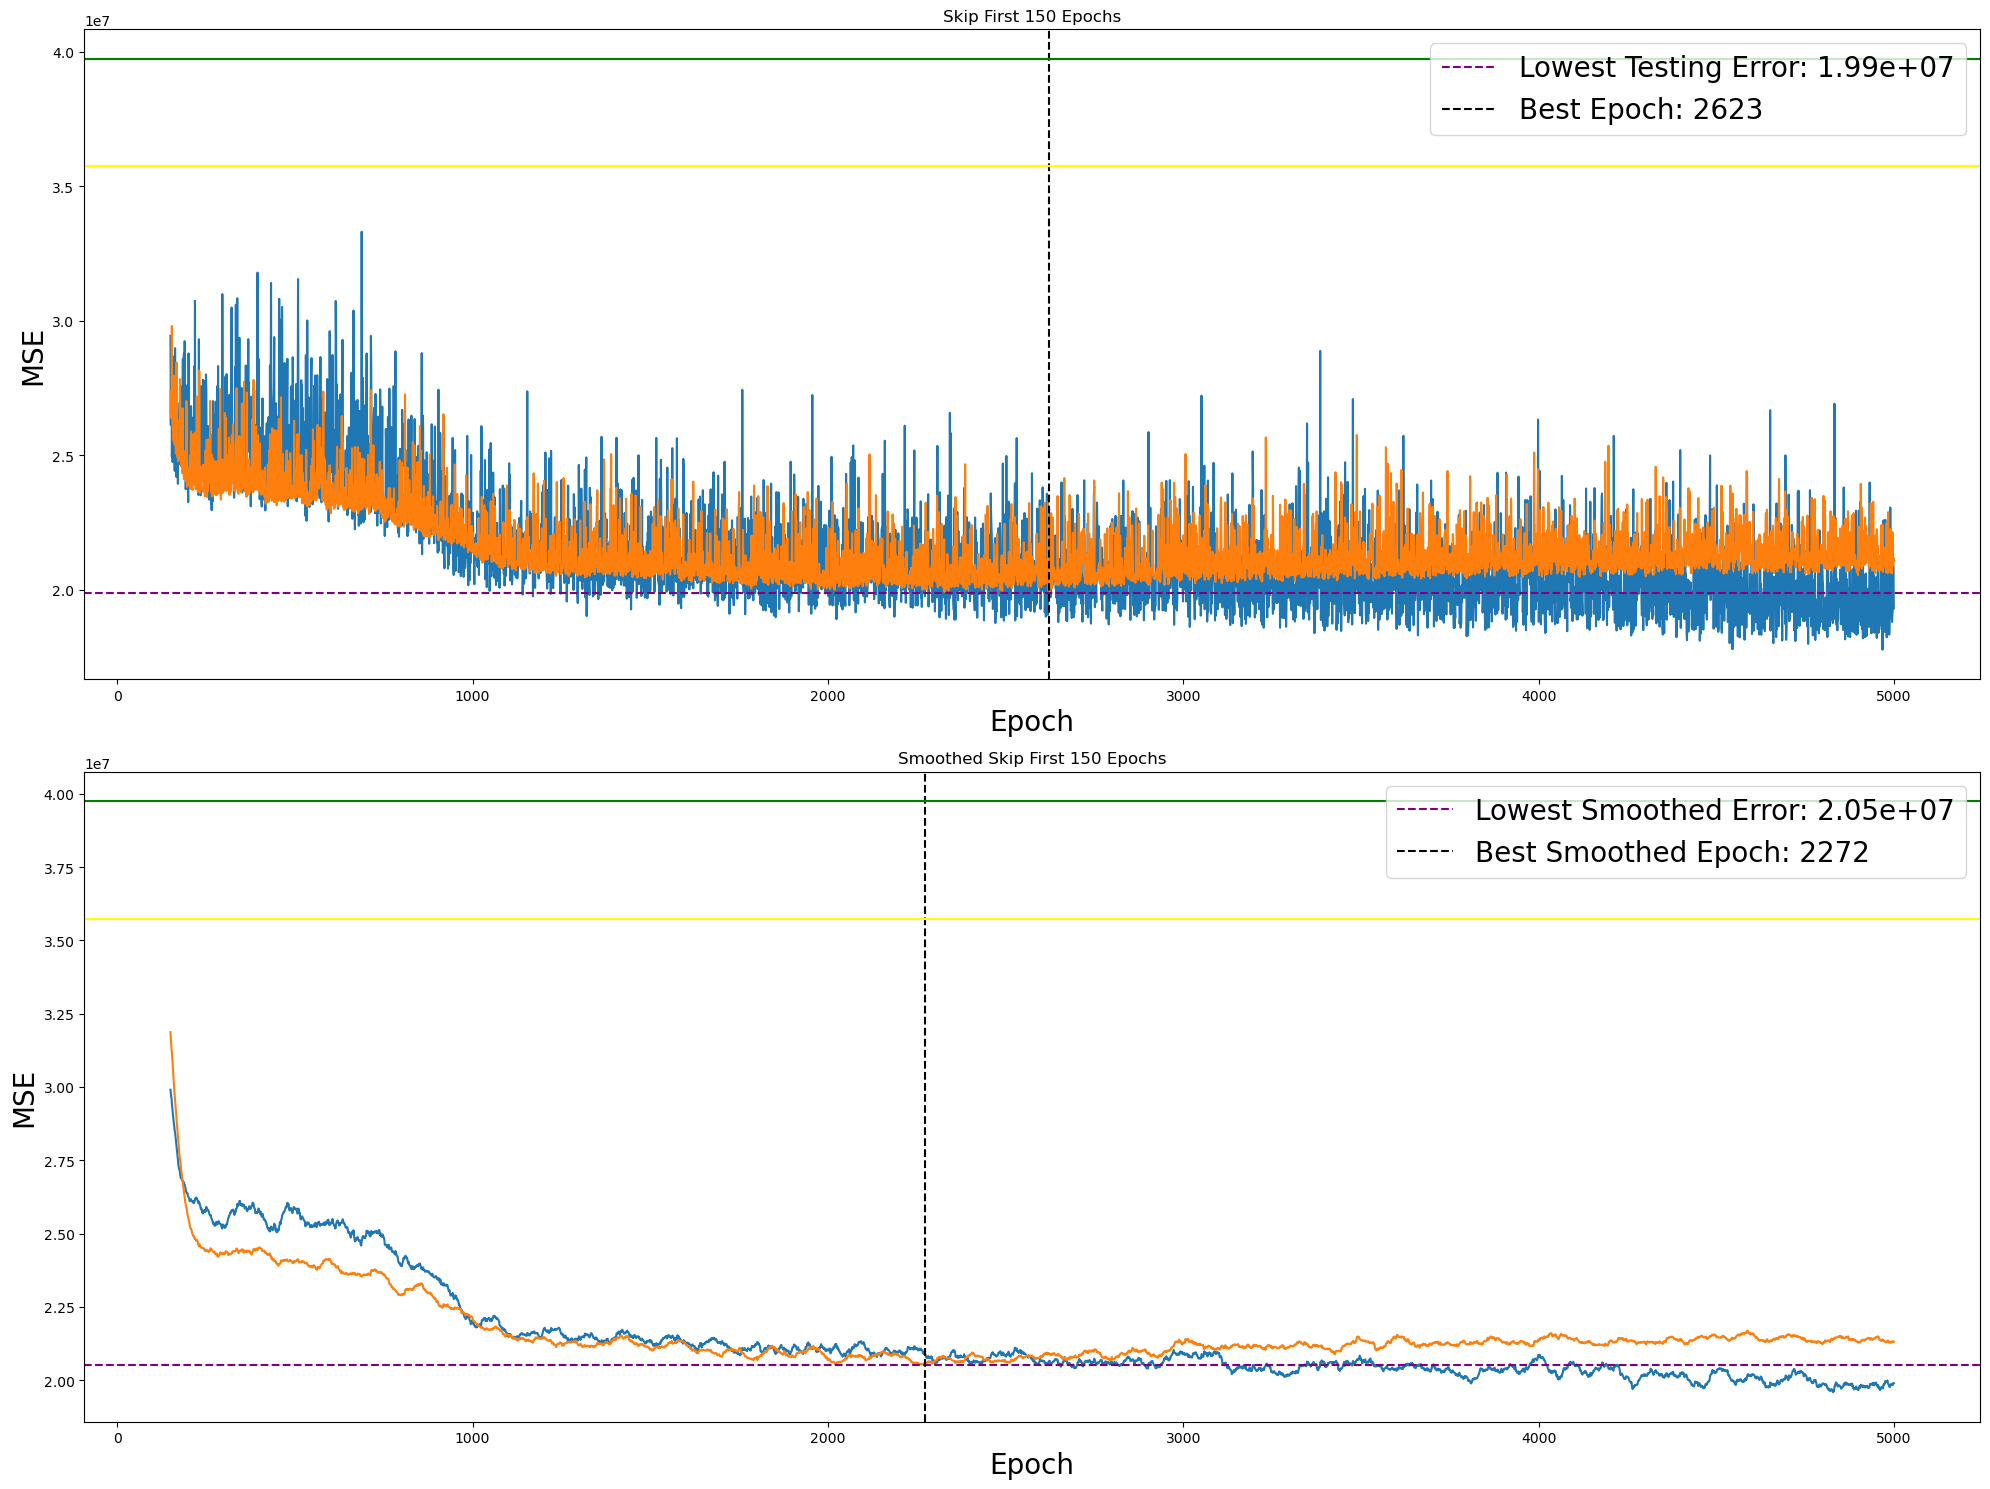

In [29]:
fig, axes = plt.subplots(2, 1, figsize = (20,15))
axes[0].plot(range(150,epochs), train_error[150:epochs])
axes[0].plot(range(150,epochs), test_error[150:epochs])
axes[0].set_title("Skip First 150 Epochs")
axes[0].axhline(mse_lr, color = "green")
axes[0].axhline(mse_lr_is, color = "yellow")

smooth_train = [np.mean(train_error[max(0, i -50):i+1]) for i in range(len(train_error)+1)]
smooth_test = [np.mean(test_error[max(0, i -50):i+1]) for i in range(len(test_error)+1)]
axes[1].plot(range(150,epochs), smooth_train[150:epochs])
axes[1].plot(range(150,epochs), smooth_test[150:epochs])
axes[1].set_title("Smoothed Skip First 150 Epochs")




# Add Lowest points
axes[0].axhline(min(test_error), linestyle = '--', label = f"Lowest Testing Error: {min(test_error):.2e}", color = 'purple')
axes[0].axvline(np.argmin(test_error), linestyle = '--', label = f"Best Epoch: {np.argmin(test_error)}", color = 'black')

axes[1].axhline(min(smooth_test), linestyle = '--', label = f"Lowest Smoothed Error: {min(smooth_test):.2e}",color = 'purple')
axes[1].axvline(np.argmin(smooth_test), linestyle = '--', label = f"Best Smoothed Epoch: {np.argmin(smooth_test)}",color = 'black')



for ax in axes:
    ax.axhline(mse_lr,  color = "green")
    ax.axhline(mse_lr_is,  color = "yellow")
    ax.set_ylabel("MSE", fontsize="20")
    ax.set_xlabel("Epoch", fontsize="20")
    ax.legend(loc = 'upper right', fontsize="20")
    
plt.tight_layout()

## Remarks
1. Training and testing errors quickly become lower than OLS
2. Testing error stays flat (on average) after 1000 and starts trending up at 3000
3. Training error gets slightly better after 1000 epochs all the way to 5000 epochs
4. Observations 2 + 3 suggest overfitting

Let's see what happens if we keep training the network for another 10000 epochs

In [30]:
for t in range(epochs, 3*epochs):
    epoch_train(X_train, y_train, model, optimizer, mse_func, train_error, batch_size = batch_size)
    epoch_test(X_test, y_test, model, mse_func, test_error)
    # If this is the best model in terms of out-of-sample or testing error, save it
    if test_error[t] <= best_fit:
        best_fit = test_error[t]
        torch.save(model.state_dict(), "lecture_generated_objects//best_network.pth") 
        best_epoch_index = t 
        
    if (t+1) % 1000 == 0:
        print(f"Epoch {t+1} Complete\n-------------------------------")
        print(f"Train Error Was {train_error[t]}")
        print(f"Test Error Was {test_error[t]}")
        print("-------------------------------")

Epoch 6000 Complete
-------------------------------
Train Error Was 20174245.711052407
Test Error Was 20952052.950981725
-------------------------------
Epoch 7000 Complete
-------------------------------
Train Error Was 19371309.320299324
Test Error Was 21583895.09919409
-------------------------------
Epoch 8000 Complete
-------------------------------
Train Error Was 18929701.5833873
Test Error Was 21577273.474494115
-------------------------------
Epoch 9000 Complete
-------------------------------
Train Error Was 18027038.466702815
Test Error Was 21760462.878681134
-------------------------------
Epoch 10000 Complete
-------------------------------
Train Error Was 20462433.64312751
Test Error Was 25124436.679267377
-------------------------------
Epoch 11000 Complete
-------------------------------
Train Error Was 17886917.84780348
Test Error Was 22445824.172618367
-------------------------------
Epoch 12000 Complete
-------------------------------
Train Error Was 17614168.5526538

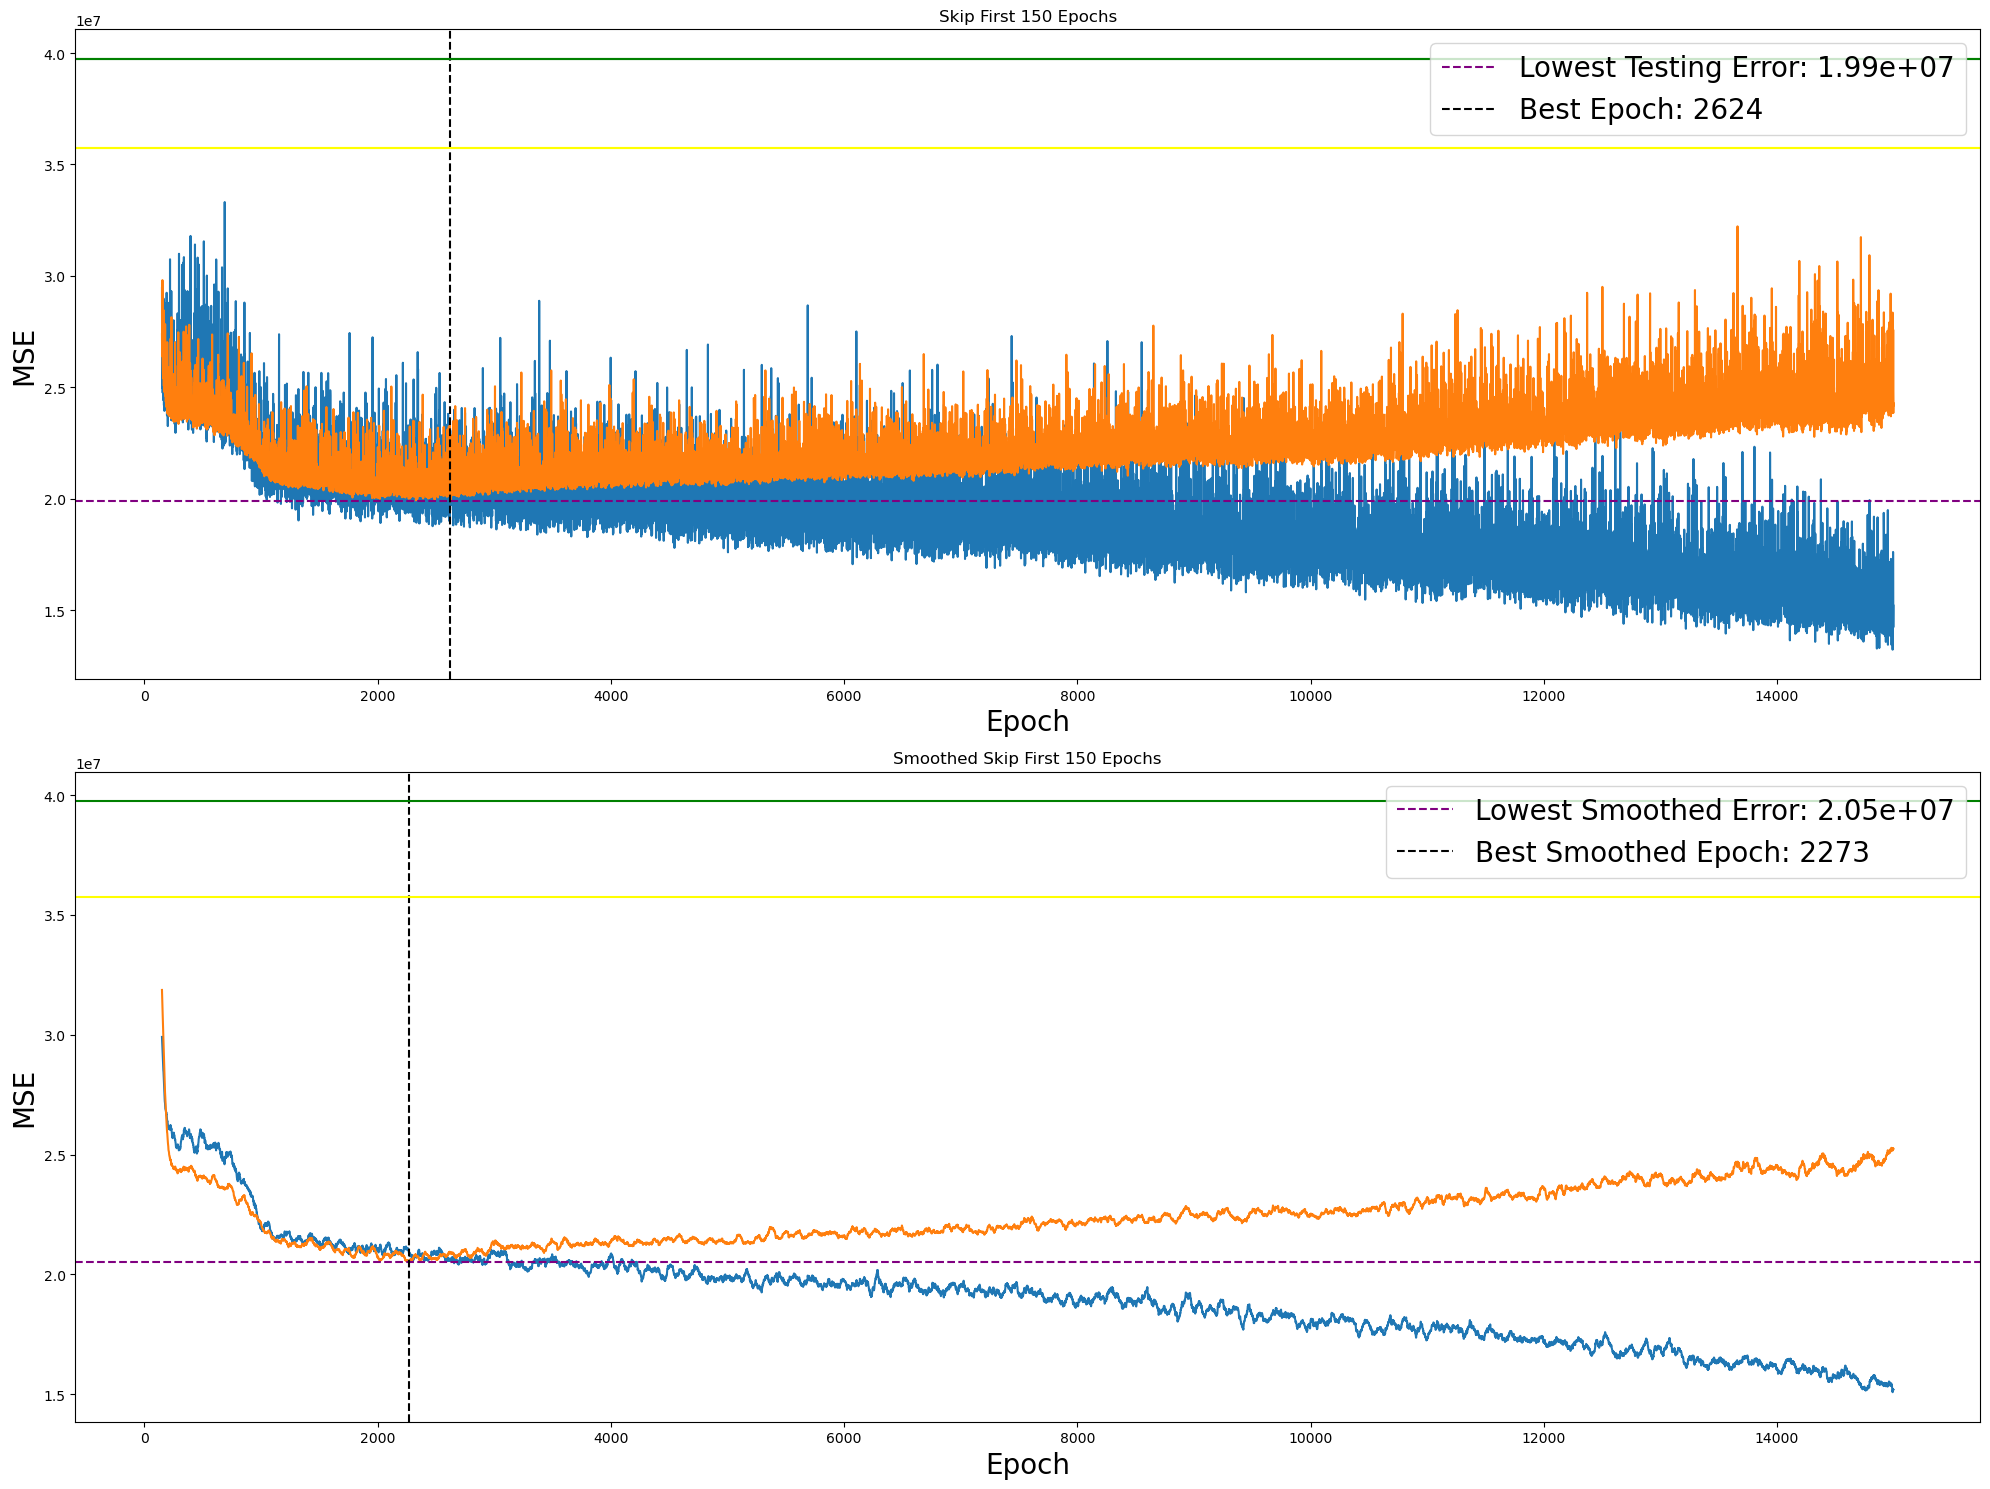

In [31]:
fig, axes = plt.subplots(2, 1, figsize = (20,15))
axes[0].plot(range(150,3*epochs), train_error[150:3*epochs])
axes[0].plot(range(150,3*epochs), test_error[150:3*epochs])
axes[0].set_title("Skip First 150 Epochs")
axes[0].axhline(mse_lr, color = "green")
axes[0].axhline(mse_lr_is, color = "yellow")

smooth_train = [np.mean(train_error[max(0, i -50):i+1]) for i in range(len(train_error)+1)]
smooth_test = [np.mean(test_error[max(0, i -50):i+1]) for i in range(len(test_error)+1)]
axes[1].plot(range(150,3*epochs), smooth_train[150:3*epochs])
axes[1].plot(range(150,3*epochs), smooth_test[150:3*epochs])
axes[1].set_title("Smoothed Skip First 150 Epochs")




# Add Lowest points
axes[0].axhline(min(test_error), linestyle = '--', label = f"Lowest Testing Error: {min(test_error):.2e}", color = 'purple')
axes[0].axvline(np.argmin(test_error), linestyle = '--', label = f"Best Epoch: {np.argmin(test_error)+1}", color = 'black')

axes[1].axhline(min(smooth_test), linestyle = '--', label = f"Lowest Smoothed Error: {min(smooth_test):.2e}",color = 'purple')
axes[1].axvline(np.argmin(smooth_test), linestyle = '--', label = f"Best Smoothed Epoch: {np.argmin(smooth_test)+1}",color = 'black')



for ax in axes:
    ax.axhline(mse_lr,  color = "green")
    ax.axhline(mse_lr_is,  color = "yellow")
    ax.set_ylabel("MSE", fontsize="20")
    ax.set_xlabel("Epoch", fontsize="20")
    ax.legend(loc = 'upper right', fontsize="20")
    
plt.tight_layout()

## Not Much Improvement & Loading the Best Network
It seems like an extra 5000 epochs did not do much for the testing error and seems to have even resulted in overfitting. This may be the best we can do with this network architecture. Since we saved the model with the lowest test mse, we can load it and use it for predictions. 

In [32]:
# Initialize Model of the same class
best_model = MLP()

# Load the parameters
best_model.load_state_dict(torch.load('lecture_generated_objects//best_network_fix.pth'))


<All keys matched successfully>

In [33]:
# Call .eval() when just using to predict
best_model.eval()
# Check to see if test mse matches our lowest test mse-- it does!
skl.metrics.mean_squared_error(y_test.detach().numpy(), best_model.forward(X_test).detach().numpy())

19880351.361304596

## Performance by Region
Now our model has been chosen and we can apply it to all of our data. First, we can look at how the performance of the model varies for various segments of the population.

In [34]:
# Save predicted charges in DataFrame and squared difference
df["predicted_charges"] = best_model.forward(X).detach().numpy()
df["squared_difference"] = (df["charges"] - df["predicted_charges"]) ** 2

Text(0.5, 0, 'MSE')

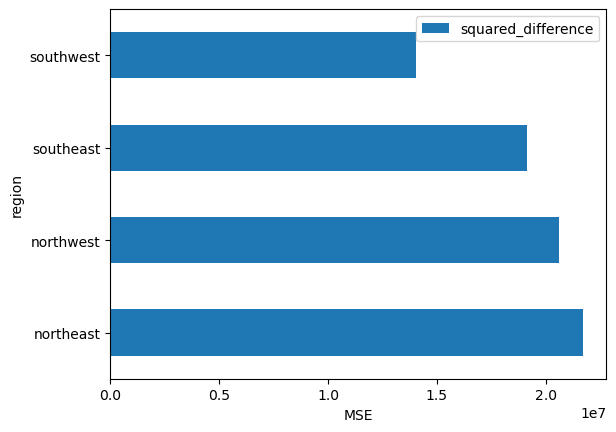

In [35]:
df_region = df[["region", "squared_difference"]]
df_region = df_region.groupby("region").mean()
df_region.plot(kind = "barh")
plt.xlabel("MSE")

## Classification Example
We have already talked about how you turn a network meant for regression into one meant for binary classification -- add a logistic function to the output layer and a cutoff rule. To do **multiclass classification** we use the same function we used to turn logistic regression into multinomial logistic regression. This is known as the **Softmax** activation function. This yields probabilities for each class and chooses the most likely.

In this example, we will use an example of trying to classify dry beans based on some characteristics. See [here](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset) for the Dataset and a description. 

**Data Citation**: KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507


### Load the Data
We load the data in and figure out what variables it contains and the number of labels (types of beans). We can see that there are seven types. we also need to create our `X` and `y` and turn them into tensors.

In [36]:
# Load DF
bean_df = pd.read_csv("..//data//Dry_Bean_Dataset.csv")

# Explore Data
print(bean_df.info())
print(bean_df["Class"].unique())
# Add Numeric for class names
bean_dict = dict(zip(bean_df["Class"].unique(),range(7)))
bean_df["class_numeric"] = pd.Series([bean_dict[bean] for bean in bean_df["Class"]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [37]:
# Make X
X = bean_df.drop(columns = ["Class", "class_numeric"])
X["Area"] = [float(x) for x in X["Area"]]
X["ConvexArea"] = [float(x) for x in X["ConvexArea"]]

# Make y numeric
y =bean_df["class_numeric"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=40)
X = torch.tensor(X.to_numpy())
y = torch.tensor(y.to_numpy())
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

In [39]:
print(bean_df["Class"].unique())
print(X.shape)
print(y.shape)

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
torch.Size([13611, 16])
torch.Size([13611])


## Network Architecture
Now, we need our network to be able to classify. Using the list containing our previous network, we can create the classification network. Now, we need an output layer with seven layers for each type of bean. We have 16 input variables, so we need to have that many input nodes which means we need to change both the batch norm layers and the first linear layer.

In [40]:
# make copy so when we change it, it does not change original list
class_model_list = model_list.copy()
class_model_list

[('norm',
  BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)),
 ('in_h1', Linear(in_features=8, out_features=15, bias=True)),
 ('act_1', ReLU()),
 ('h1_h2', Linear(in_features=15, out_features=20, bias=True)),
 ('act_2', LeakyReLU(negative_slope=0.01)),
 ('h2_h3', Linear(in_features=20, out_features=20, bias=True)),
 ('act_3', LeakyReLU(negative_slope=0.01)),
 ('h3_h4', Linear(in_features=20, out_features=15, bias=True)),
 ('act_4', LeakyReLU(negative_slope=0.1)),
 ('h4_out', Linear(in_features=15, out_features=1, bias=True))]

In [41]:
# Replace batchnorm layer with one that takes more features
class_model_list[0] = ('norm', nn.BatchNorm1d(16))
# Replace Input layer with one that takes more features
class_model_list[1] = ('in_h1', nn.Linear(16, ns[0]))
# Replace previous output layer with a 7 node output
class_model_list[len(model_list)-1] = (f'h{len(ns)}_out', nn.Linear(ns[len(ns)-1], 7))
# Add softmax activation
class_model_list.append(('agg', nn.Softmax(dim=1)))

In [42]:
bean_model = nn.Sequential(OrderedDict(class_model_list)).to()

We make another class for this model. Even though you can easily have a class that takes many networks, it can help us keep which network architectures go with which class when loading weights.

In [43]:
class MLP_class(nn.Module):
    # This is a Constructor that helps us construct the object when it is initialized using MLP()
    def __init__(self):
        super().__init__()
        self.network = bean_model
        
    # This is called forward because it sends the data x through the network to give us a prediction
    def forward(self, x):
        yhat = self.network(x)
        return yhat

In [44]:
model = MLP_class().to(device, dtype=float)
model

MLP_class(
  (network): Sequential(
    (norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (in_h1): Linear(in_features=16, out_features=15, bias=True)
    (act_1): ReLU()
    (h1_h2): Linear(in_features=15, out_features=20, bias=True)
    (act_2): LeakyReLU(negative_slope=0.01)
    (h2_h3): Linear(in_features=20, out_features=20, bias=True)
    (act_3): LeakyReLU(negative_slope=0.01)
    (h3_h4): Linear(in_features=20, out_features=15, bias=True)
    (act_4): LeakyReLU(negative_slope=0.1)
    (h4_out): Linear(in_features=15, out_features=7, bias=True)
    (agg): Softmax(dim=1)
  )
)

In [45]:
# How much data we feed the network at once
batch_size = 256

# How many batches we feed the network
epochs = 10000

# Define Loss Function -- cross entropy is the multiclass entropy function
entropy_func = nn.CrossEntropyLoss()

# Set up Optimizer (SGD)
# Set learning rate
learning_rate = 1e-3

# Tell optimizer the learning rate and which parameters to learn
optimizer = torch.optim.SGD(bean_model.parameters(), lr=learning_rate)

In [46]:
train_error = []
test_error = []
best_fit = np.inf
best_epoch_index = -1
for t in range(epochs):
    epoch_train(X_train, y_train, model, optimizer, entropy_func, train_error, batch_size = batch_size)
    epoch_test(X_test, y_test, model, entropy_func, test_error)
    # If this is the best model in terms of out-of-sample or testing error, save it
    if test_error[t] <= best_fit:
        best_fit = test_error[t]
        torch.save(model.state_dict(), "lecture_generated_objects//best_network_class.pth") 
        best_epoch_index = t
        
    if (t+1) % 25 == 0:
        print(f"Epoch {t+1} Complete\n-------------------------------")
        print(f"Train Error Was {train_error[t]}")
        print(f"Test Error Was {test_error[t]}")
        print("-------------------------------")

Epoch 25 Complete
-------------------------------
Train Error Was 1.9339622115263282
Test Error Was 1.9384694140028764
-------------------------------
Epoch 50 Complete
-------------------------------
Train Error Was 1.8730362236631306
Test Error Was 1.8735604407038078
-------------------------------
Epoch 75 Complete
-------------------------------
Train Error Was 1.8627428351192779
Test Error Was 1.8618896426043374
-------------------------------
Epoch 100 Complete
-------------------------------
Train Error Was 1.853837808719702
Test Error Was 1.8562019710711626
-------------------------------
Epoch 125 Complete
-------------------------------
Train Error Was 1.8472395417768792
Test Error Was 1.8550246285438876
-------------------------------
Epoch 150 Complete
-------------------------------
Train Error Was 1.8398592903918283
Test Error Was 1.837076454244408
-------------------------------
Epoch 175 Complete
-------------------------------
Train Error Was 1.8326788127978553
Test Er

Epoch 1400 Complete
-------------------------------
Train Error Was 1.627273794656529
Test Error Was 1.6199243543152413
-------------------------------
Epoch 1425 Complete
-------------------------------
Train Error Was 1.6265219973050709
Test Error Was 1.6196937074150892
-------------------------------
Epoch 1450 Complete
-------------------------------
Train Error Was 1.625502397580326
Test Error Was 1.6185194219841026
-------------------------------
Epoch 1475 Complete
-------------------------------
Train Error Was 1.6265458450297872
Test Error Was 1.6185555492884591
-------------------------------
Epoch 1500 Complete
-------------------------------
Train Error Was 1.6264324304617683
Test Error Was 1.6185556172555644
-------------------------------
Epoch 1525 Complete
-------------------------------
Train Error Was 1.6252367704287725
Test Error Was 1.6187497129721955
-------------------------------
Epoch 1550 Complete
-------------------------------
Train Error Was 1.62610325465289

Epoch 2750 Complete
-------------------------------
Train Error Was 1.6225974057234545
Test Error Was 1.614354313658928
-------------------------------
Epoch 2775 Complete
-------------------------------
Train Error Was 1.6227098059826135
Test Error Was 1.6142791786927697
-------------------------------
Epoch 2800 Complete
-------------------------------
Train Error Was 1.622486415346891
Test Error Was 1.6143712637085401
-------------------------------
Epoch 2825 Complete
-------------------------------
Train Error Was 1.6216422636183578
Test Error Was 1.6140235466932733
-------------------------------
Epoch 2850 Complete
-------------------------------
Train Error Was 1.6216625801273619
Test Error Was 1.6140659350278128
-------------------------------
Epoch 2875 Complete
-------------------------------
Train Error Was 1.6218900289008098
Test Error Was 1.6140377209663508
-------------------------------
Epoch 2900 Complete
-------------------------------
Train Error Was 1.62181396934539

Epoch 4100 Complete
-------------------------------
Train Error Was 1.6195245863645022
Test Error Was 1.6126691631601748
-------------------------------
Epoch 4125 Complete
-------------------------------
Train Error Was 1.620411307374914
Test Error Was 1.6130873382325868
-------------------------------
Epoch 4150 Complete
-------------------------------
Train Error Was 1.6200128112740104
Test Error Was 1.612489678548394
-------------------------------
Epoch 4175 Complete
-------------------------------
Train Error Was 1.6208273970256857
Test Error Was 1.612415144237677
-------------------------------
Epoch 4200 Complete
-------------------------------
Train Error Was 1.6200119687891819
Test Error Was 1.6125737198260486
-------------------------------
Epoch 4225 Complete
-------------------------------
Train Error Was 1.62032510606958
Test Error Was 1.6123930993082316
-------------------------------
Epoch 4250 Complete
-------------------------------
Train Error Was 1.6199591892607796


Epoch 5450 Complete
-------------------------------
Train Error Was 1.6185734996852759
Test Error Was 1.6109224314639772
-------------------------------
Epoch 5475 Complete
-------------------------------
Train Error Was 1.6178575771769117
Test Error Was 1.6104945913649664
-------------------------------
Epoch 5500 Complete
-------------------------------
Train Error Was 1.618637419594639
Test Error Was 1.6104539678011212
-------------------------------
Epoch 5525 Complete
-------------------------------
Train Error Was 1.6178830483957538
Test Error Was 1.6101275173536764
-------------------------------
Epoch 5550 Complete
-------------------------------
Train Error Was 1.618364099025006
Test Error Was 1.609935949256734
-------------------------------
Epoch 5575 Complete
-------------------------------
Train Error Was 1.6168066489963617
Test Error Was 1.6101075380754644
-------------------------------
Epoch 5600 Complete
-------------------------------
Train Error Was 1.617162414829972

Epoch 6800 Complete
-------------------------------
Train Error Was 1.5588705850095428
Test Error Was 1.5550382059032446
-------------------------------
Epoch 6825 Complete
-------------------------------
Train Error Was 1.5594525567493194
Test Error Was 1.5542146080699843
-------------------------------
Epoch 6850 Complete
-------------------------------
Train Error Was 1.5565339479454183
Test Error Was 1.5543570937025628
-------------------------------
Epoch 6875 Complete
-------------------------------
Train Error Was 1.5572777067314068
Test Error Was 1.5524832420532197
-------------------------------
Epoch 6900 Complete
-------------------------------
Train Error Was 1.5558831039219734
Test Error Was 1.5522793699931474
-------------------------------
Epoch 6925 Complete
-------------------------------
Train Error Was 1.5555118431673112
Test Error Was 1.5516188317105004
-------------------------------
Epoch 6950 Complete
-------------------------------
Train Error Was 1.554782803574

Epoch 8150 Complete
-------------------------------
Train Error Was 1.5427134578740767
Test Error Was 1.5402685823156372
-------------------------------
Epoch 8175 Complete
-------------------------------
Train Error Was 1.5426669866050986
Test Error Was 1.5396801786851693
-------------------------------
Epoch 8200 Complete
-------------------------------
Train Error Was 1.5435799022522967
Test Error Was 1.5391526666168711
-------------------------------
Epoch 8225 Complete
-------------------------------
Train Error Was 1.5424933019711724
Test Error Was 1.5403721558021337
-------------------------------
Epoch 8250 Complete
-------------------------------
Train Error Was 1.542611747946928
Test Error Was 1.538989510650462
-------------------------------
Epoch 8275 Complete
-------------------------------
Train Error Was 1.542237317205231
Test Error Was 1.5389497653116417
-------------------------------
Epoch 8300 Complete
-------------------------------
Train Error Was 1.542458835440944

Epoch 9500 Complete
-------------------------------
Train Error Was 1.5378575551187745
Test Error Was 1.5354216994923637
-------------------------------
Epoch 9525 Complete
-------------------------------
Train Error Was 1.5371747849317965
Test Error Was 1.5357205457435446
-------------------------------
Epoch 9550 Complete
-------------------------------
Train Error Was 1.5369177291031646
Test Error Was 1.5351691014081799
-------------------------------
Epoch 9575 Complete
-------------------------------
Train Error Was 1.5368876014795392
Test Error Was 1.5353543093933053
-------------------------------
Epoch 9600 Complete
-------------------------------
Train Error Was 1.5370204184324237
Test Error Was 1.5349074188256469
-------------------------------
Epoch 9625 Complete
-------------------------------
Train Error Was 1.53662908874323
Test Error Was 1.5349180557178375
-------------------------------
Epoch 9650 Complete
-------------------------------
Train Error Was 1.53654582049433

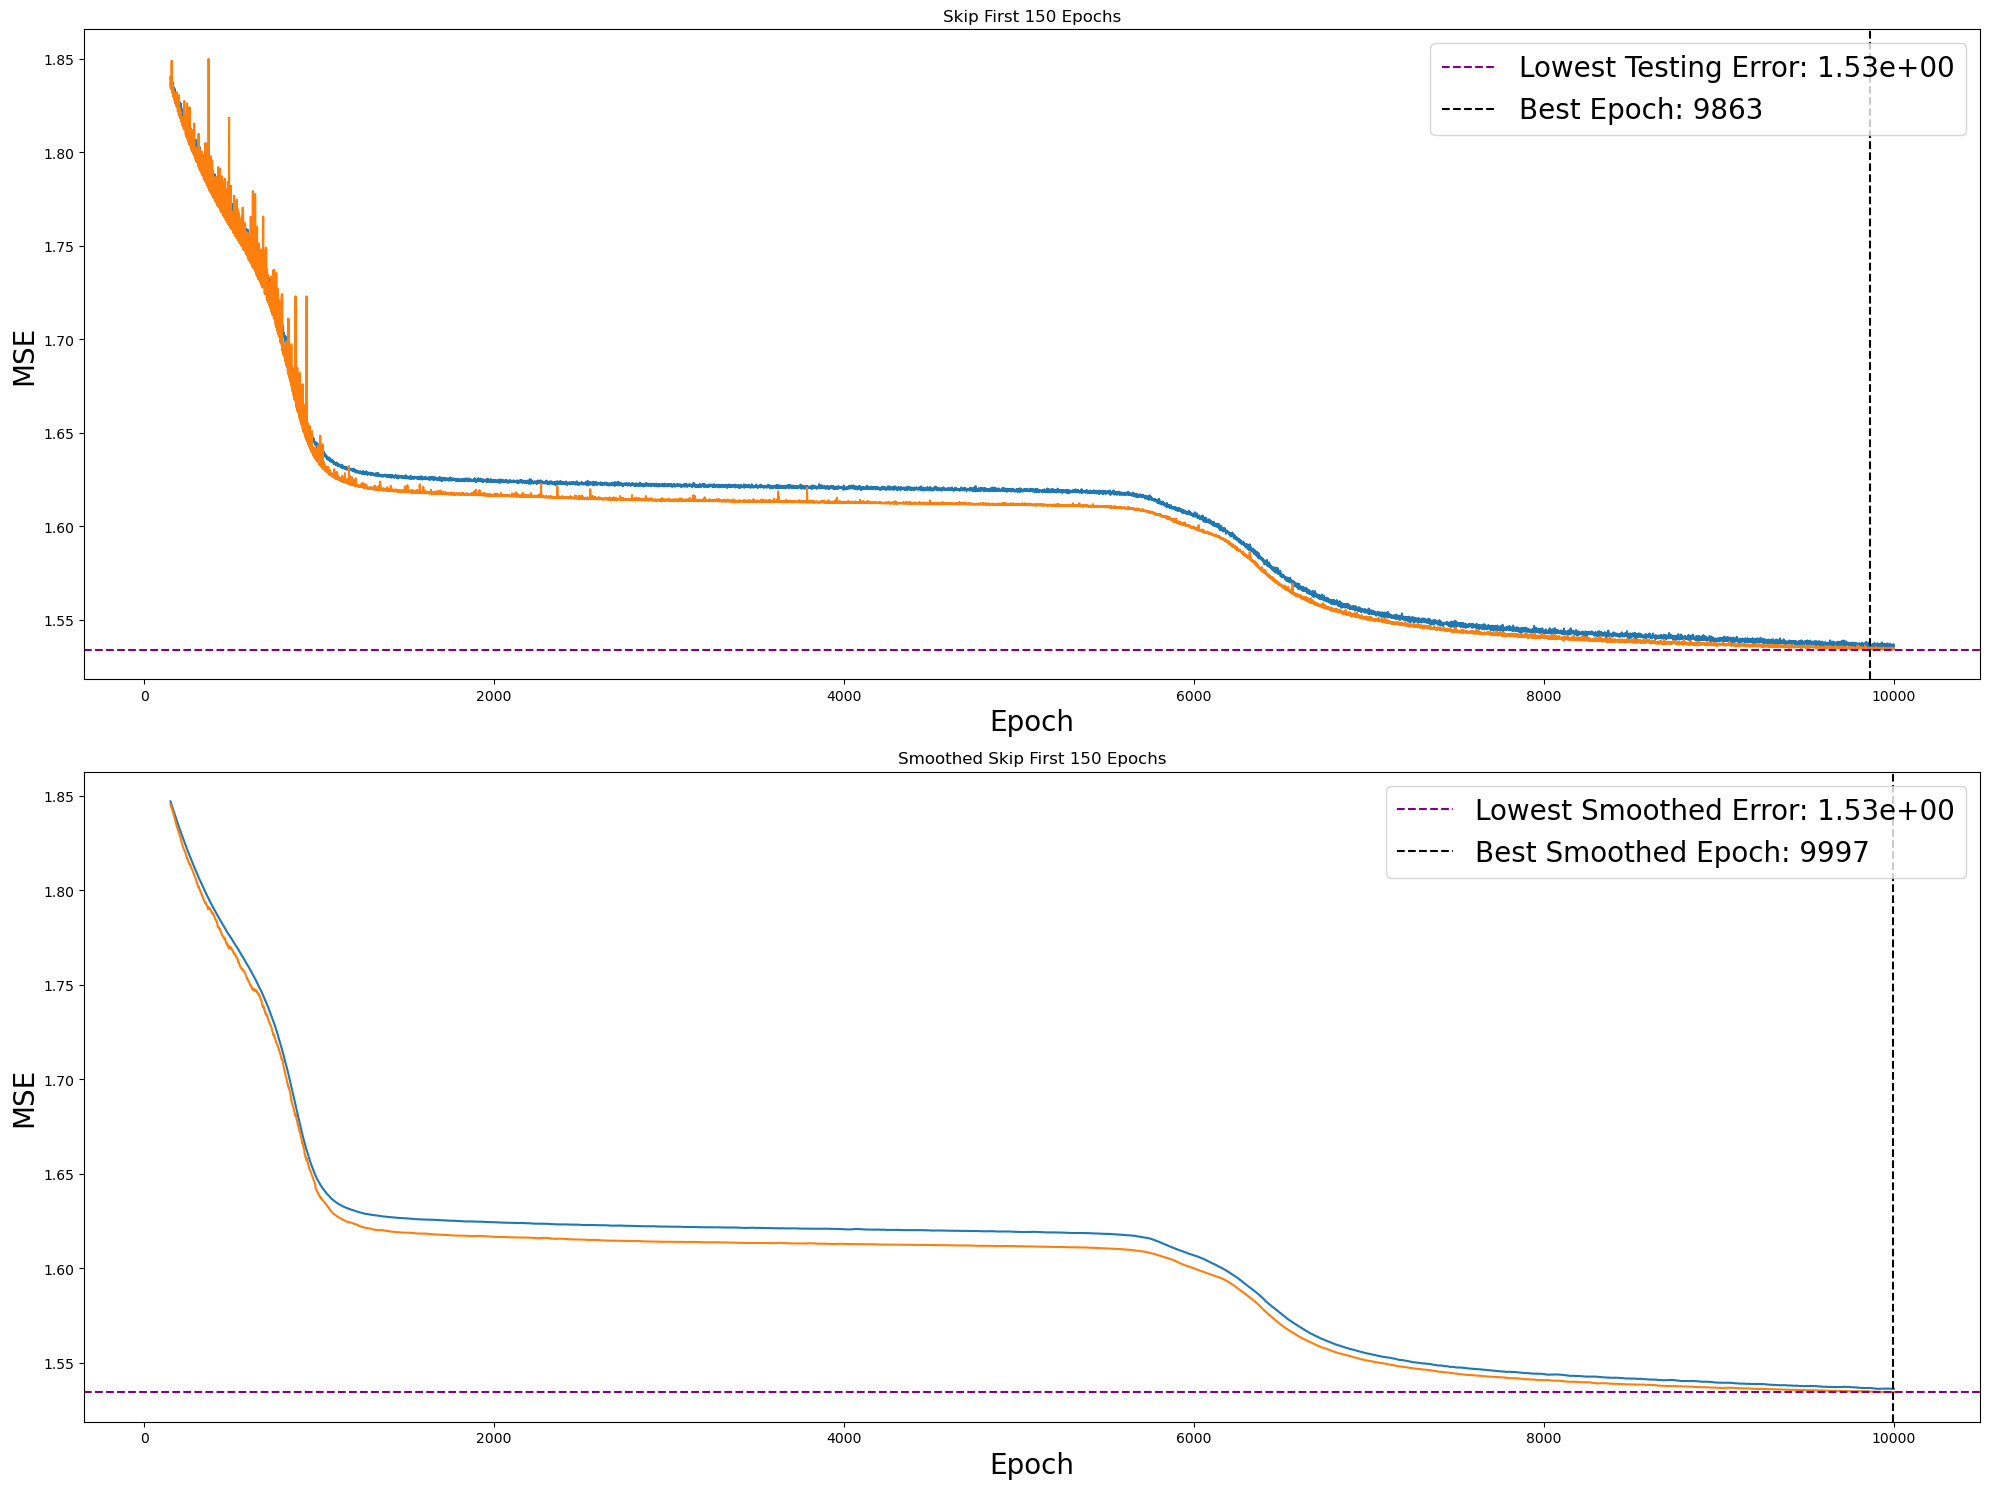

In [47]:
fig, axes = plt.subplots(2, 1, figsize = (20,15))
axes[0].plot(range(150,epochs), train_error[150:epochs])
axes[0].plot(range(150,epochs), test_error[150:epochs])
axes[0].set_title("Skip First 150 Epochs")


smooth_train = [np.mean(train_error[max(0, i -50):i+1]) for i in range(len(train_error)+1)]
smooth_test = [np.mean(test_error[max(0, i -50):i+1]) for i in range(len(test_error)+1)]
axes[1].plot(range(150,epochs), smooth_train[150:epochs])
axes[1].plot(range(150,epochs), smooth_test[150:epochs])
axes[1].set_title("Smoothed Skip First 150 Epochs")




# Add Lowest points
axes[0].axhline(min(test_error), linestyle = '--', label = f"Lowest Testing Error: {min(test_error):.2e}", color = 'purple')
axes[0].axvline(np.argmin(test_error), linestyle = '--', label = f"Best Epoch: {np.argmin(test_error)}", color = 'black')

axes[1].axhline(min(smooth_test), linestyle = '--', label = f"Lowest Smoothed Error: {min(smooth_test):.2e}",color = 'purple')
axes[1].axvline(np.argmin(smooth_test), linestyle = '--', label = f"Best Smoothed Epoch: {np.argmin(smooth_test)}",color = 'black')



for ax in axes:
    ax.set_ylabel("MSE", fontsize="20")
    ax.set_xlabel("Epoch", fontsize="20")
    ax.legend(loc = 'upper right', fontsize="20")
    
plt.tight_layout()

### Keep training
The best epocs were near the end of the iterations, so it looks like we could benefit more by training.

In [48]:
for t in range(epochs, 3*epochs):
    epoch_train(X_train, y_train, model, optimizer, entropy_func, train_error, batch_size = batch_size)
    epoch_test(X_test, y_test, model, entropy_func, test_error)
    # If this is the best model in terms of out-of-sample or testing error, save it
    if test_error[t] <= best_fit:
        best_fit = test_error[t]
        torch.save(model.state_dict(), "lecture_generated_objects//best_network_class.pth") 
        best_epoch_index = t 
        
    if (t+1) % 1000 == 0:
        print(f"Epoch {t+1} Complete\n-------------------------------")
        print(f"Train Error Was {train_error[t]}")
        print(f"Test Error Was {test_error[t]}")
        print("-------------------------------")

Epoch 11000 Complete
-------------------------------
Train Error Was 1.5329050895848948
Test Error Was 1.5322912358143375
-------------------------------
Epoch 12000 Complete
-------------------------------
Train Error Was 1.5307254443836928
Test Error Was 1.5292062116603602
-------------------------------
Epoch 13000 Complete
-------------------------------
Train Error Was 1.5214844969227526
Test Error Was 1.5211646409779438
-------------------------------
Epoch 14000 Complete
-------------------------------
Train Error Was 1.5017660947799194
Test Error Was 1.5017211154303045
-------------------------------
Epoch 15000 Complete
-------------------------------
Train Error Was 1.4665316922088873
Test Error Was 1.4655663599829767
-------------------------------
Epoch 16000 Complete
-------------------------------
Train Error Was 1.4039104659478348
Test Error Was 1.4043115000445678
-------------------------------
Epoch 17000 Complete
-------------------------------
Train Error Was 1.39106

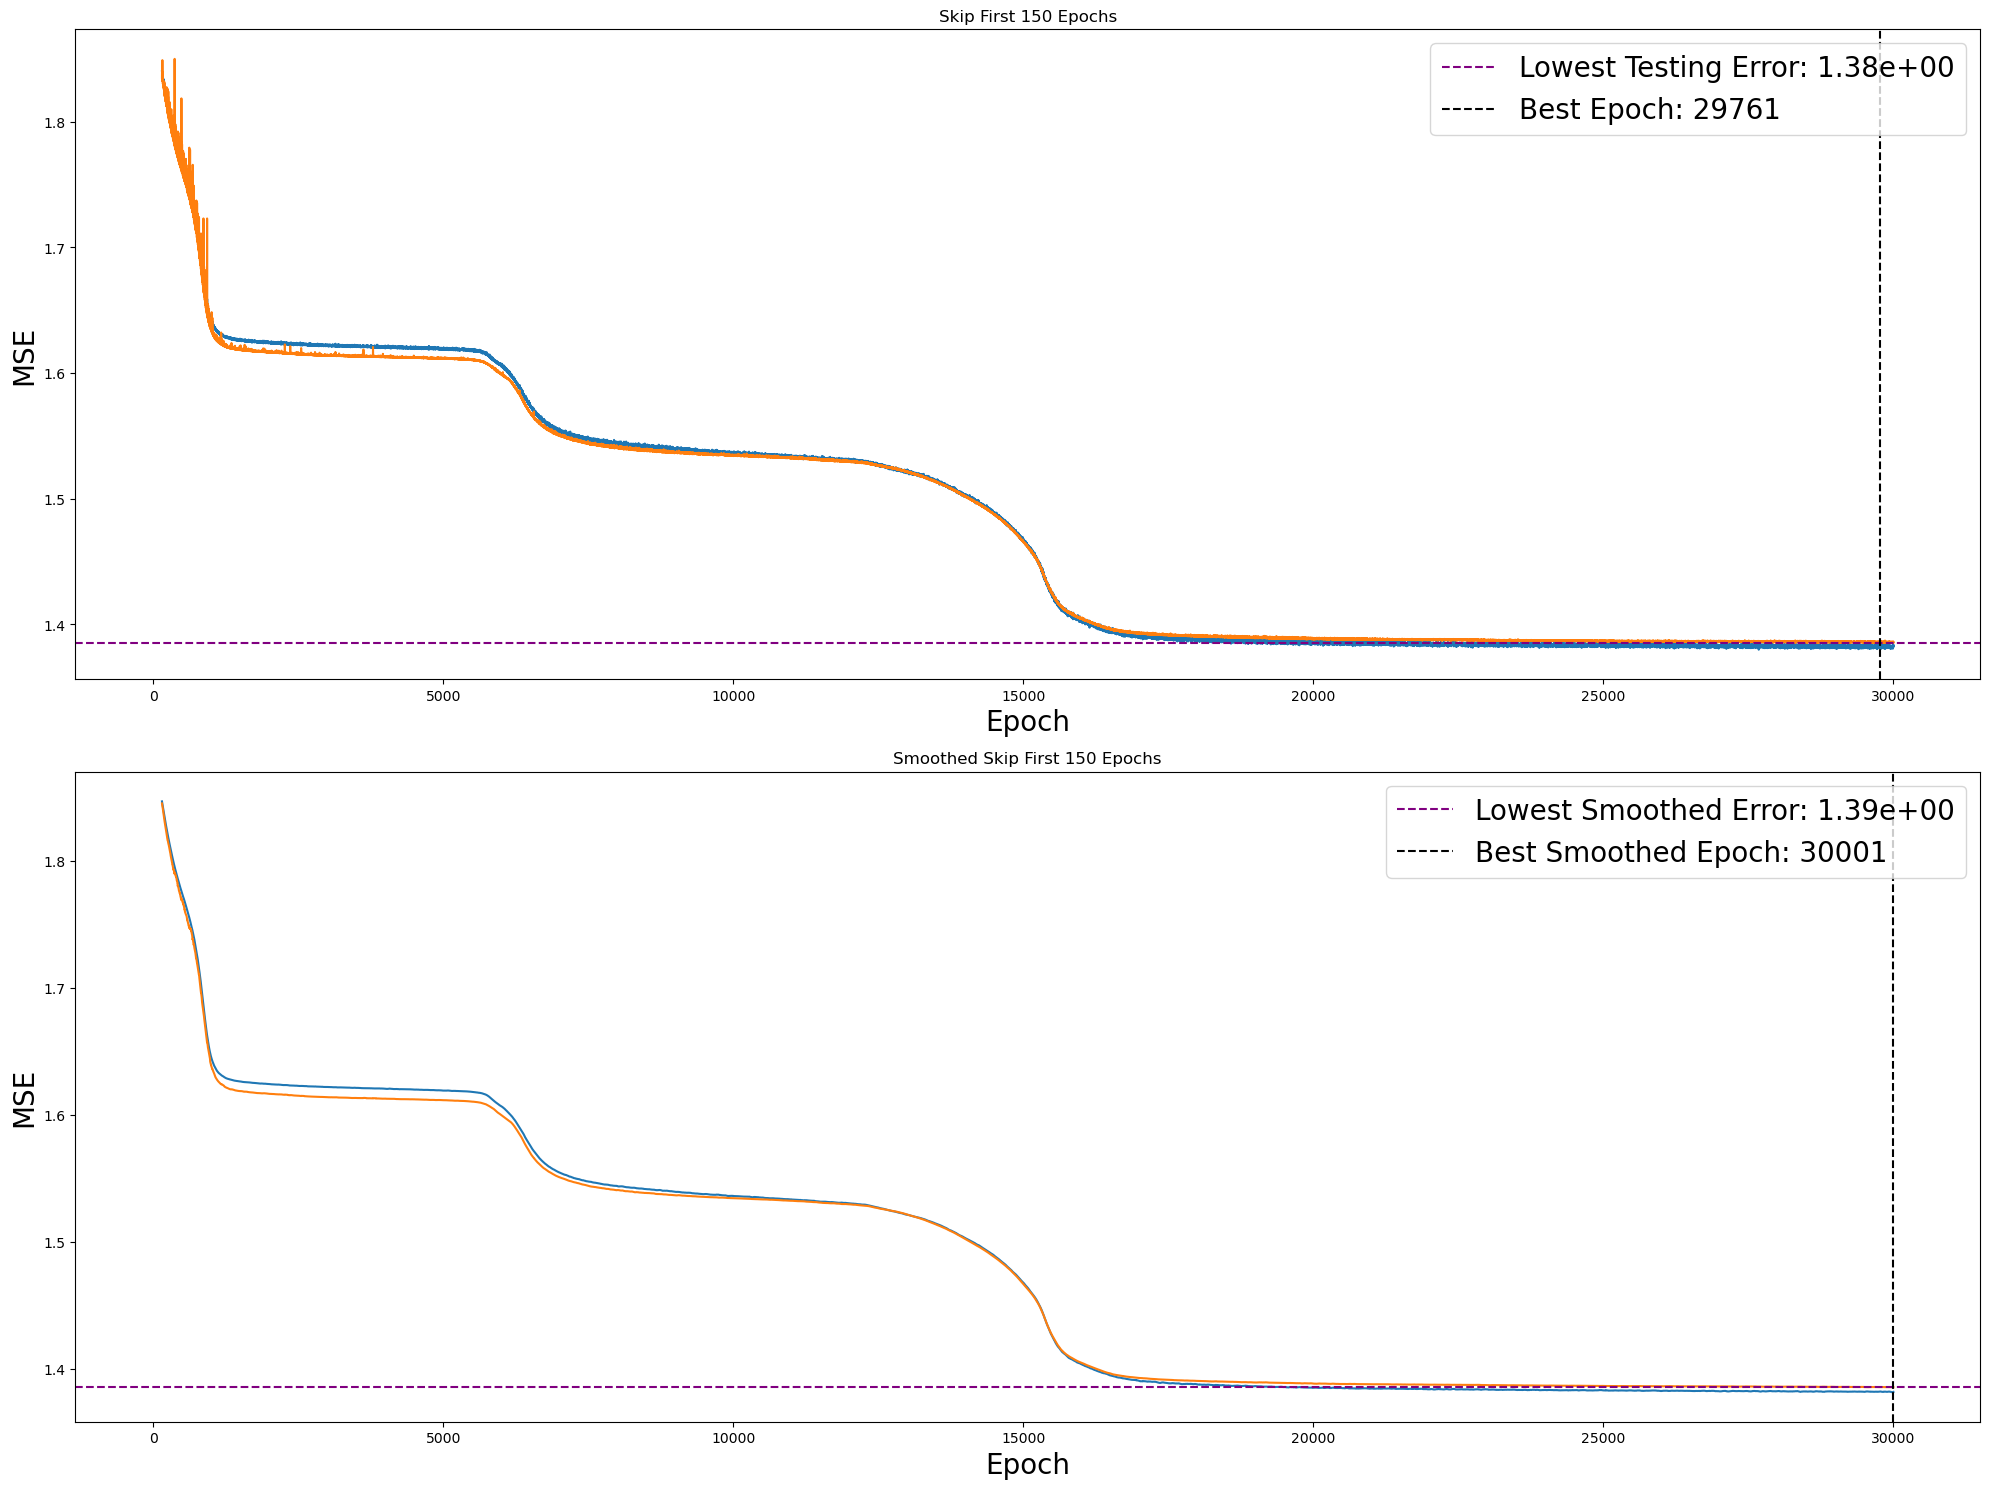

In [49]:
fig, axes = plt.subplots(2, 1, figsize = (20,15))
axes[0].plot(range(150,3*epochs), train_error[150:3*epochs])
axes[0].plot(range(150,3*epochs), test_error[150:3*epochs])
axes[0].set_title("Skip First 150 Epochs")


smooth_train = [np.mean(train_error[max(0, i -50):i+1]) for i in range(len(train_error)+1)]
smooth_test = [np.mean(test_error[max(0, i -50):i+1]) for i in range(len(test_error)+1)]
axes[1].plot(range(150,3*epochs), smooth_train[150:3*epochs])
axes[1].plot(range(150,3*epochs), smooth_test[150:3*epochs])
axes[1].set_title("Smoothed Skip First 150 Epochs")




# Add Lowest points
axes[0].axhline(min(test_error), linestyle = '--', label = f"Lowest Testing Error: {min(test_error):.2e}", color = 'purple')
axes[0].axvline(np.argmin(test_error), linestyle = '--', label = f"Best Epoch: {np.argmin(test_error)+1}", color = 'black')

axes[1].axhline(min(smooth_test), linestyle = '--', label = f"Lowest Smoothed Error: {min(smooth_test):.2e}",color = 'purple')
axes[1].axvline(np.argmin(smooth_test), linestyle = '--', label = f"Best Smoothed Epoch: {np.argmin(smooth_test)+1}",color = 'black')



for ax in axes:

    ax.set_ylabel("MSE", fontsize="20")
    ax.set_xlabel("Epoch", fontsize="20")
    ax.legend(loc = 'upper right', fontsize="20")
    
plt.tight_layout()

## Remarks
It seems like we could maybe keep going nad there would be another drop off. I did this for another 20,000 epochs and saved the best result. It did not improve things by much. 

In [50]:
for t in range(3*epochs, 5*epochs):
    epoch_train(X_train, y_train, model, optimizer, entropy_func, train_error, batch_size = batch_size)
    epoch_test(X_test, y_test, model, entropy_func, test_error)
    # If this is the best model in terms of out-of-sample or testing error, save it
    if test_error[t] <= best_fit:
        best_fit = test_error[t]
        torch.save(model.state_dict(), "lecture_generated_objects//best_network_class.pth") 
        best_epoch_index = t 
        
    if (t+1) % 1000 == 0:
        print(f"Epoch {t+1} Complete\n-------------------------------")
        print(f"Train Error Was {train_error[t]}")
        print(f"Test Error Was {test_error[t]}")
        print("-------------------------------")

Epoch 31000 Complete
-------------------------------
Train Error Was 1.382240191731507
Test Error Was 1.3855045667882553
-------------------------------
Epoch 32000 Complete
-------------------------------
Train Error Was 1.3810714517553229
Test Error Was 1.3852401658167017
-------------------------------
Epoch 33000 Complete
-------------------------------
Train Error Was 1.3820661799334941
Test Error Was 1.385445756368503
-------------------------------
Epoch 34000 Complete
-------------------------------
Train Error Was 1.3807541597483142
Test Error Was 1.384821917466703
-------------------------------
Epoch 35000 Complete
-------------------------------
Train Error Was 1.3810155719909187
Test Error Was 1.3847473931214207
-------------------------------
Epoch 36000 Complete
-------------------------------
Train Error Was 1.381206432682198
Test Error Was 1.3847924791168738
-------------------------------
Epoch 37000 Complete
-------------------------------
Train Error Was 1.381406093

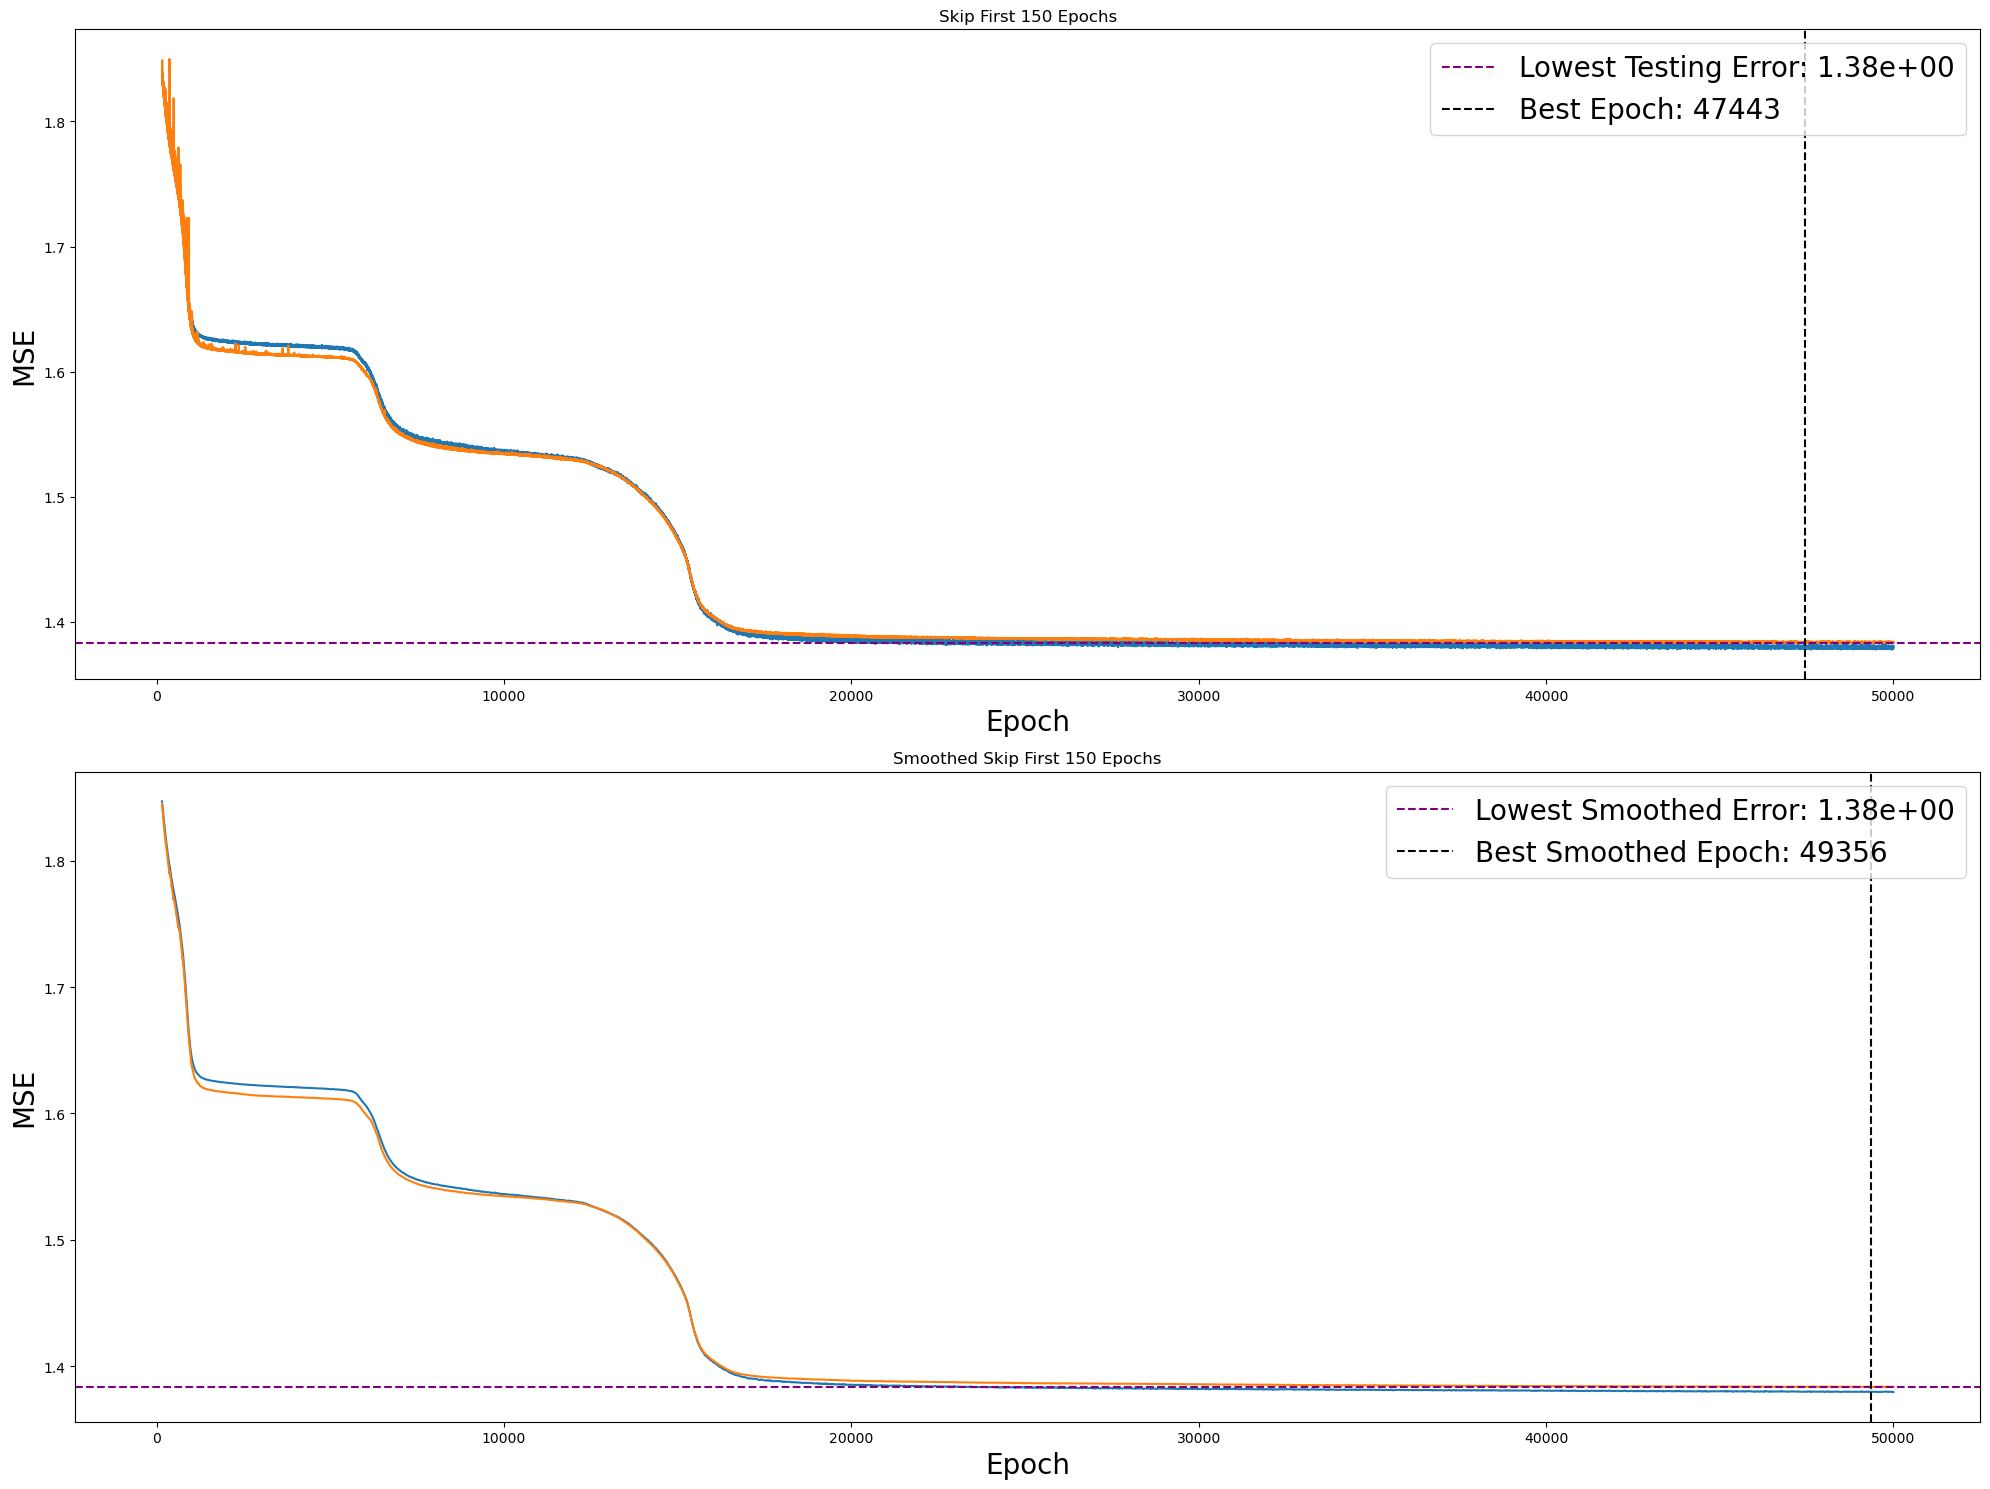

In [51]:
fig, axes = plt.subplots(2, 1, figsize = (20,15))
axes[0].plot(range(150,5*epochs), train_error[150:5*epochs])
axes[0].plot(range(150,5*epochs), test_error[150:5*epochs])
axes[0].set_title("Skip First 150 Epochs")


smooth_train = [np.mean(train_error[max(0, i -50):i+1]) for i in range(len(train_error)+1)]
smooth_test = [np.mean(test_error[max(0, i -50):i+1]) for i in range(len(test_error)+1)]
axes[1].plot(range(150,5*epochs), smooth_train[150:5*epochs])
axes[1].plot(range(150,5*epochs), smooth_test[150:5*epochs])
axes[1].set_title("Smoothed Skip First 150 Epochs")




# Add Lowest points
axes[0].axhline(min(test_error), linestyle = '--', label = f"Lowest Testing Error: {min(test_error):.2e}", color = 'purple')
axes[0].axvline(np.argmin(test_error), linestyle = '--', label = f"Best Epoch: {np.argmin(test_error)+1}", color = 'black')

axes[1].axhline(min(smooth_test), linestyle = '--', label = f"Lowest Smoothed Error: {min(smooth_test):.2e}",color = 'purple')
axes[1].axvline(np.argmin(smooth_test), linestyle = '--', label = f"Best Smoothed Epoch: {np.argmin(smooth_test)+1}",color = 'black')



for ax in axes:

    ax.set_ylabel("MSE", fontsize="20")
    ax.set_xlabel("Epoch", fontsize="20")
    ax.legend(loc = 'upper right', fontsize="20")
    
plt.tight_layout()

## Use the Model to Classify
Entropy is hard to interpret. We can use the best model to classify and see how accurate our bean prediction is in terms of percentage guessed correctly on the test dataset. 

In [57]:
# Initialize Model of the same class
best_model = MLP_class()

# Load the parameters
best_model.load_state_dict(torch.load('lecture_generated_objects//best_network_class_fix.pth'))


<All keys matched successfully>

In [88]:
yhat = best_model(X_test).argmax(dim = 1)
guess_correct = np.array([1 * (yh == ys) for yh,ys in zip(yhat, y_test)])
guess_correct.mean()

0.7778185824458318

In [89]:
bean_list = np.array(list(bean_dict))[y_test.detach().numpy()]

test_df = pd.DataFrame([bean_list, guess_correct]).T
test_df = test_df.rename(columns = {0 : "Bean Variety", 1 : "Correct"})
group_bean_df  = test_df.groupby("Bean Variety")
group_bean_df.mean()

,Correct
Bean Variety,
BARBUNYA,0.944882
BOMBAY,1.000000
CALI,0.952978
DERMASON,0.986667
HOROZ,0.959786
SEKER,0.959494
SIRA,0.000000


In [94]:
yhat.unique()

tensor([0, 1, 2, 3, 4, 6])

## Remarks
- We obtained a test accuracy of around 78\%
- Could get better results with more training or sophisticated architecture
- Not predicting Sira ever -- this could be because of Class imbalance

## Beyond Regression, Classification, and Generic Tabular Data
Neural networks can be used for more than regression and classification. Many of these applications require more sophisticated network architectures, data pipelines, etc.. 

PyTorch has different layers you can add. Some can be applied to many tasks whereas others suited for particular tasks. 

The best way to learn what's out there is to have a feasible machine learning project to apply it to. Moving beyond tabular data is what necessitates a lot of these architectures (text data, image data, time series data, learning agent models, etc.) and how the models are trained can vary from context to context. 

A lot of these architecture can be constructed quite easily using the same nn.sequential structure. To see all of the different layers, activation functions, losses, etc. you can visit this [torch nn reference](https://pytorch.org/docs/stable/nn.html).